<img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="360">


# InsaidTelecom - Consulting Assignment

<img src = "https://user-images.githubusercontent.com/53637541/86231610-73396180-bbb0-11ea-920f-6936e0e3fe9a.png">


## Problem Statement

This project is aimed towards building an interactive dashboard to understand customers demographic characteristics based on the influencing factors such as mobile usage, geolocation, and mobile device properties. We also need to find the customers behavioral characteristics and suggest actionable insights, thus helping INSAID improve it's marketing strategy and product terms.

<img src = "https://user-images.githubusercontent.com/53637541/86231590-6c125380-bbb0-11ea-92d7-750c5ba5dd3e.PNG">


## Choosing the right tools

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 500)
#pd.set_option("display.float_format", "{:.1f}".format)
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from matplotlib.dates import date2num
from termcolor import colored
import missingno as msno
from termcolor import colored
from pywaffle import Waffle
import squarify
import seaborn as sns
#sns.set(style = "whitegrid", font_scale = 1.3, color_codes = True)
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.express as px
import chart_studio.plotly as py
from plotly.subplots import make_subplots
from plotly import tools
import plotly.offline 
plotly.offline.init_notebook_mode()
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
import descartes
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from branca.element import Figure
from dateutil.parser import parse 
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")

## Downloading the dataset from the Insaid database

__Connecting to MySql__

In [ ]:
import mysql.connector as mysql

mydb = mysql.connect(
    host = "cpanel.insaid.co",
    user = "student",
    passwd = "student",
    database = "Capstone1"
)

print(mydb)

__Checking all the tables available in Capstone1 Database__

In [ ]:
cursor = mydb.cursor()

#Getting all the tables which are present in 'Capstone1' database
cursor.execute("SHOW TABLES")

#This returns list of tables present in the database
tables = cursor.fetchall() 

#Showing all the tables one by one
for table in tables:
    print(table)

__Fetching the data from table gender_age_train__

In [ ]:
cursor.execute('SELECT * FROM gender_age_train')
table_rows = cursor.fetchall()

df_gender_age_train = pd.DataFrame(table_rows)
df_gender_age_train = pd.read_sql('SELECT * FROM gender_age_train', con=mydb)
df_gender_age_train.head()

__Downloading the dataset into CSV format file__

In [ ]:
#Change the directory path where you want to save the file
#df_gender_age_train.to_csv(r'G:\Capstone Project Data Analysis\gender_age_train.csv', index = False)

__Fetching the data from table phone_brand_device_model__

In [ ]:
cursor.execute('SELECT * FROM phone_brand_device_model')
table_rows = cursor.fetchall()

df_phone_brand_device_model = pd.DataFrame(table_rows)
df_phone_brand_device_model = pd.read_sql('SELECT * FROM phone_brand_device_model', con=mydb)
df_phone_brand_device_model.head()

__Downloading the dataset into CSV format file__

In [ ]:
#Change the directory path where you want to save the file
#df_phone_brand_device_model.to_csv(r'G:\Capstone Project Data Analysis\phone_brand_device_model.csv', index = False)

__For simplicity purpose, all the datasets has been uploaded to Github, so others can access the dataset directly using the links.__ 

## Importing the datasets

__Note: Please download and import the file, the events_dataset file has been uploaded in the zip folder__ 

In [ ]:
#Access the file from directory
df1 = pd.read_csv(r"G:\Capstone Project Data Analysis\events_data.csv")
df1.head()

event_id     device_id            timestamp  longitude   latitude  \
0   2765368  2.973348e+18  2016-05-07 22:52:05  77.225676  28.730140   
1   2955066  4.734221e+18  2016-05-01 20:44:16  88.388361  22.660325   
2    605968 -3.264500e+18  2016-05-02 14:23:04  77.256809  28.757906   
3    448114  5.731369e+18  2016-05-03 13:21:16  80.343613  13.153332   
4    665740  3.388880e+17  2016-05-06 03:51:05  85.997745  23.842609   

       city       state  
0     Delhi       Delhi  
1  Calcutta  WestBengal  
2     Delhi       Delhi  
3   Chennai   TamilNadu  
4    Bokaro   Jharkhand

| Column Name        | Description                                                    
| -------------      |:-------------                                            :
| event_id           | Represents an event whenever a user access INSAID Telecom network.                                       
| device_id          | Represents the mobile device similar to an IMEI number.                  
| timestamp          | Represents the date and time.      
| longitude          | Represents geographical coordinates east-west position on earth surface.        
| latitude           | Represents geographical coordinates north-south position on earth surface.   
| city               | Represents the city where customer is located. 
| state              | Represents the state where customer is located.


In [ ]:
df2 = pd.read_csv("https://raw.githubusercontent.com/MathewKevin/Capstone1DataAnalysis/master/gender_age_train.csv")
df2.head()

| Column Name        | Description                                               |
| -------------      |:-------------                                            :| 
| device_id          | Represents the mobile device similar to an IMEI number.                  
| gender             | Represents whether the customer is a male or a female.     
| age                | Represents the age of the customer.          
| group              | Represents the age group of the customer.      


In [ ]:
df3 = pd.read_csv("https://raw.githubusercontent.com/MathewKevin/Capstone1DataAnalysis/master/phone_brand_device_model.csv")
df3.head()

| Column Name        | Description                                               |
| -------------      |:-------------                                            :| 
| device_id          | Represents the mobile device similar to an IMEI number.                  
| phone_brand        | Represents the mobile brand that a customer uses.     
| device_model       | Represents the model of the mobile a customer uses.          

## Data Processing

In [ ]:
#Checking for the basic summary of the dataset
df1.info(null_counts = True)

__Observations__

- The dataset contains __3252950 records__ and __7 columns__.
- There are missing values in __device_id,longitude,latitude and state__ Columns.
- There are __3 categorical columns__ and __4 numerical columns__.

In [ ]:
#Creating a function to count missing values and their percentages

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = (df.isnull().sum() * 100 / len(df))
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(3)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [ ]:
df1_missing = missing_values_table(df1) 
df1_missing

### Replacing the missing values in the State column

In [ ]:
#Taking out all the states with NaN and creating a new column to cross verify the city and state
df1["state_duplicate"] = df1["state"]
df1[df1["state"].isnull()]

In [ ]:
#Replacing the missing states using the city column
separating = df1.dropna(subset=['state']).drop_duplicates('city').set_index('city')['state']
df1['state'] = df1['state'].fillna(df1['city'].map(separating))

In [ ]:
#Cross verifying if the states are correctly matching with cities
df1[df1["state_duplicate"].isnull()]

In [ ]:
df1.drop("state_duplicate", axis = 1, inplace = True)
df1.head()

### Replacing missing values in latitude and longitude columns

In [ ]:
#Replacing the missing values in latitude and longitude using available device_id (Method Used : Forward Fill)
cols = ["latitude","longitude"]
df1.update(df1.groupby("device_id")[cols].ffill().fillna(0))

### Replacing missing values in device_id column

In [ ]:
#Replacing the missing values in device_id column using latitude and longitude (Method Used : Forward Fill)
df1.update(df1.groupby(["latitude","longitude"])["device_id"].ffill().fillna(0))

In [ ]:
missing_data = missing_values_table(df1)
missing_data

### Most of the values in city, state, latitude and longitude columns have wrong information, so we raise a question : Which column is reliable in terms of geospatial information?

- __Should we need to use coordinates to find the correct city/state or Should we use city/state to find correct coordinates?__
- __One way to solve this problem is : We assume that the coordinates are correct and find out the correct city and state. Then we filter out the 6 states and create a new dataframe.__

In [ ]:
import reverse_geocoder as rg 
import pprint 

def reverseGeocode(coordinates): 
    result = rg.search(coordinates)
    return (result)

if __name__=="__main__": 

    # Coordinates tuple, it can contain more than one pair.
    coordinates =list(zip(df1['latitude'],df1['longitude'])) # generates pair of (lat,long)
    data = reverseGeocode(coordinates)

    df1['name'] = [i['name'] for i in data]
    df1['admin1'] = [i['admin1'] for i in data]
    df1['admin2'] = [i['admin2'] for i in data]

In [ ]:
df1.rename(columns={'name': 'exact_place_name', 'admin1': 'correct_state', 'admin2': 'correct_city_municipality'}, inplace=True)

In [ ]:
df1.head()

In [ ]:
df1.nunique()

In [ ]:
df1.correct_state.unique()

### Picking the 6 states out from the events dataset and create a new dataframe with those 6 states

In [ ]:
#Separating the 6 states out of the dataset to create a new dataframe
states_to_focus = df1[(df1['correct_state'].isin(['Tamil Nadu','Tripura','Uttar Pradesh','Arunachal Pradesh','Chandigarh','Manipur']))]
df_states = pd.DataFrame(states_to_focus)
df_states = df_states.reset_index(drop = True)
df_states.head()

In [ ]:
#Checking the basic details of the dataset that contains only 6 states
df_states.info()

In [ ]:
#Checking for missing values in the dataset that contains only six states
missing_data = missing_values_table(df_states)
missing_data

### Verifying the coordinates in the dataset

In [ ]:
print("Latitude Min:",df_states.latitude.min())
print("Latitude Max:",df_states.latitude.max())
print("Longitude Min:",df_states.longitude.min())
print("Longitude Max:",df_states.longitude.max())

__Observation__

- The coordinates are not having same count of digits after the decimal point.
- India is situated north of the equator between 8°4' north to 37°6' north latitude and 68°7' east to 97°25' east longitude.
- There are some coordinates that goes out of the Indian coordinates range.

In [ ]:
#Let's standardize the decimals count in lat and long
df_states["latitude"] = df_states["latitude"].round(6)
df_states["longitude"] = df_states["longitude"].round(6)

In [ ]:
df_states[df_states["latitude"] > 34]

In [ ]:
#Cross verifying the latitued and longitude
print("Latitude Min:",df_states.latitude.min())
print("Latitude Max:",df_states.latitude.max())
print("Longitude Min:",df_states.longitude.min())
print("Longitude Max:",df_states.longitude.max())

### Checking for chances whether one customer can stay at two different locations

In [ ]:
customer_location = df_states.groupby("device_id").filter(lambda x: x["latitude"].nunique() > 1)
customer_location.groupby('device_id').aggregate({'latitude': lambda x: x.nunique(), 'longitude': lambda x: x.nunique()})

In [ ]:
df_states.nunique()

In [ ]:
df_states.correct_state.unique()

In [ ]:
df_states.state.unique()

In [ ]:
df_states[df_states["state"] == "Punjab"]

In [ ]:
#Since city and state columns have wrong information, we can drop them
cols_drop = ["city","state"]
df_states.drop(cols_drop, axis = 1, inplace = True)

In [ ]:
df_states.isnull().sum()

In [ ]:
#Let's separate date and time into new columns
#df_states['date'] = pd.to_datetime(df_states['timestamp']).dt.date
#df_states['time'] = pd.to_datetime(df_states['timestamp']).dt.time

In [ ]:
df2.head()

In [ ]:
df2.info()

In [ ]:
#Let's convert the device_id column to float64
df2["device_id"] = df2["device_id"].astype("float64")

In [ ]:
print("Age Minimum:", df2.age.min())
print("Age Maximum:", df2.age.max())

In [ ]:
df3.head()

In [ ]:
df3.info()

In [ ]:
df3.nunique()

__Observation__

- There are 116 phone brands and 1467 different models.

In [ ]:
#Let's convert the device_id column to float64
df3["device_id"] = df3["device_id"].astype("float64")

### Converting Chinese Characters to Engish 

In [ ]:
list_cn = df3['phone_brand'].unique().tolist()
print(list_cn)

In [ ]:
list_cn_model = df3['device_model'].unique().tolist()
print(list_cn_model)

In [ ]:
list_en = ['vivo','Xiaomi','OPPO','Samsung','Cool','Lenovo','Huawei','Qiku','Meizu','Fixun',
       'China Mobile','HTC','Tianyu','Supreme Treasure','LG','Obson','Umi','ZUK','Nubia','HP',
       'Nibiru','Meitu','Xianmi','Motorola','Mengmi','Hammer','Focus','LeTV','Hisense','Baifeng',
       'One Plus','Letter','Haier','Coolby','Newman','Wave','Duowei','Listening Rhyme','TCL','Cupper','Aipal ',
       'LOGO','Shallot','Guomi','ASUS','Onda','Ai Youni','Konka','Yougo','Banghua','Saibo Yuhua',
       'Black Rice','Lovme','Pioneer','E Pie','Shenzhou','Nokia','Pnell','Sugar Gourd','Yitong','European New',
       'Mickey','Cube Rubiks Cube','Blue Devil','Little Poplar','Belfong','Glutinous Rice','Mige','Eren Eben','Simi','Big Q' ,
       'Taipower','Philips','Wei Mi','Da Xian','Changhong','Weitu','Green Orange','Original','Shrimp','Xia Xin','Xiao',
       'Baiga','SUGAR','Ouqi','Century Star','Chi Magnesium','Obi','Kivu','Femtosecond','Desai','Epai',
       'Google','Venus Digital','Guangxin','Noahs Letter','MIL','Bai Mi','Big Cola','Bao Jie Xun','Youyu','Shouyun',
       'Rumi','Rigao','Wopfung','Mole','Fresh Rice','Kellystone','Vibee','Ovo','Fungmi','Hengyufeng ',
       'Aux','Siemens','Oledi','PPTV']

In [ ]:
list_en_model = ['Y13','V183','R7s','A368t','Red Rice Note2','Red Rice Note3','S5.1','Galaxy Grand Prime','MI 2S','Galaxy Note 2' ,'R1C','Great God F1Plus','note top version','Galaxy Mega 2','Star 1','Galaxy S4','MI 3','Find 7','C8816','red Mi Note','X6 L','Galaxy Win','Youth Edition','MX3','Y35','G520-5000','Honor 4A','Charm Blue Note 2','Y560-CL00' ,'Honor 7i', '3000','Honor Play 4C','C730Lw','Red Rice 2A','A1','One','Galaxy J7','R3','MX2','Honor Play 5','Honor 7','MI 4','One M8','Red Rice 1S','Maimang 4','Galaxy S6 Edge','A3800d','P780','Ascend G7', 'Honor 6','Xperia SL','Y17T','Honor Play 4X','Ascend P7','Galaxy Grand 2','Honor 3X Play Version','Honor X2','Ascend P8', 'R2017','Charm Blue NOTE','Mate 2','M8','T87+','X710L','A890e','R7','X5M','MX5','Galaxy Mega 5.8', ' L81','Xperia Z1','Honor 6 Plus','X5Max+','Galaxy J5','Galaxy Note 4','A31','GN706L','G3','P8 Lite','Sensation XE with Beats Audio Z715e','A880','Honor+','X5L', '8720L','IVO 6655','R7 Plus','Honor Play 4','MX4','Y635-TL00', ' Galaxy S3','X3L', '3','R807','Golden Fighter A8','One X','Xiaomi note','R6007','Galaxy S2 Plus' ,'R1','Honor 3C','Xiaomi 4C','R823T','Mate 7','MI 2','F2','Galaxy S5','Xperia TX','Galaxy Trend DUOS 2', 'Z1','Y11IT','Red Rice Note Enhanced Edition','Tianjian W900','Ascend G700T','Galaxy Note 3','Galaxy R','F301','Honor Play 5X', ' N1 Mini','Find 5','Red Rice 2','X5Pro','X5V','A11','MI pad','Z7 Mini','Galaxy Note 5','MediaPad M2-801W', 'Galaxy Grand Neo Plus','Ascend GX1','R817','X3T','Galaxy E7','X817','GN700W','Y20T','A680','Y27', '5891', ' Great God F1','UIMI3','Compaq 7','G628','IVO 6622','B199','Galaxy Trend 3','X1ST','S7568I','C8818','Y622','Charm Blue 2','Mate 7 Youth Edition', '1107','Galaxy S2','Le Lemon K3 Note','Galaxy S4 Zoom','Galaxy Ace Dear','Fire Star One','Le Lemon K3' ,'Ascend P1','R831T','M9','U9508','X5Max', '2','X8888','Lenovo Gold Fighter S8','S60t','Great God F2','Xplay3S', 'R1S','Y60-C1','Nexus 5','UIMI4','R809T','Q507T','Moto X Style','A788t','Charm Blue','Y13iL','Glory 6 plus ','G610S','N1T','X1 7.0','Y613F','Galaxy A7','N1','Y23L','Great God F2 Full HD Edition','Inspiration XL','Flagship Edition', 'Y927','Z9 mini','X3S','Y15','R831S','R815T','R81 9T','Galaxy Core Prime','Butterfly','Galaxy Style DUOS','Xperia S','Galaxy Note 3 Lite','P6','S7','Galaxy S6','Nutum Phone', ' M210','S7I','A51','X907','Red Rice','Y33','Super Phone 1 Pro','Galaxy Grand DUOS','Xperia Z5','G620-L75','Chang Enjoy 5','Xplay','MX4 Pro','Galaxy S6 Edge+', '8185','G3588V','Y937','T528t','Galaxy A8','N3','G610T','S7T ','V5 Max','MI One Plus','S90-t','Xperia Z3 mini', '8105', '7270-W00','M8St','Desire 820','A750','S898t ','Charm Blue metal','P970','Galaxy Mega 6.3', '5890','Z9 Max','PRO5','X5SL','Y29L','E602T','GN150', '8190Q' ,'E620M','Super Phone 1', '8702D','Galaxy Grand','Galaxy Note','U960E','Grand X','Xperia arc S','T708','X','T50 ','GN128','Super Phone 1s','L700T','Galaxy A5','F103S', '5951','H1','A820','G7200','Honor U8860','Button', 'LT01','Y11','Y635','Honor Play T1','Xperia Neo','G7 Plus','Y13L','HT-I860', '8056','EVO 3D X515m', 'Red Pepper X1','Galaxy A3','Spring Thunder HD','Galaxy S2 HD LTE E120S','L5Pro','ivvi Little i','Glory Play 4C Sports Edition','Maimang 3','Ascend G700','Xiao Xian 2','Ne xus 4','R827T','G520-0000','Ascend P6','ELIFE E3T','Big 2', '5950','Q519T','Galaxy Tab P6800','A398t','Front Shang','Z5S','Y511-T00','MI One C1', '8085q','A3900','M4','L1 mini','V188S','Great God X7','Grand X Quad' ,'A320t','G2','Galaxy Core Advance','Y28L','Y22IL','Little Apple','SHV-E210L','Lewan','F103','Y928','Galaxy Ace 3','R821T','Great God Note3','MI 2A','Moto X','Y321C','Xperia Z2','I9118', '8750','K860i','G730-C00', ' A708t','A670t','S658t','Galaxy On7','Desire 820 Mini','Galaxy Ace','T1','A33', '603e','LT416','G11','S7568' ,'T528w', '6607','么么哒3N', '8730L','M2','Y11IW','W2015','Fengshang Pro','R830','ELIFE S5.5', ' Q505T', '9190l','Galaxy Note Edge','Touch 2C','Red Pepper','X3F','Y913','Galaxy Trend DUOS','Optimus G', '7296','R5', 'M512','Galaxy On5', '7105','Galaxy S3 Neo+','G520-T10','VIBE X','Mate 8','S1','MI 1S', '5263','S2y ','A369','Grand Memo 2','G750-T20','Y923','M032','R8205','A688t','glory 3X','Samsung big foot','Touch 2', 'Galaxy Premier','Y37','U956 ','S810t','HN3-U01','S650','L128','IPH8','Honor 3C Play Edition', '1100','S5830I','X6 Plus D','G606', 'B9388','Desire 826','A5800-D','Galaxy Core Lite','MI pad 2','A360t','SM-T705C','G4','ono','Find', ' Galaxy Core Max','ivvi Small Bone Pro','A53','G718C','Red Pepper XM','V5S', '3007','D800','X6 Plus','S12','I779', 'Y1','Yuanhang 3','My Prague','Y18L','Blade S6 Lux','H1S','GN715','metal standard version','U879','Desire 7088','U930HD' ,'Galaxy Note 10.1','G3818','Enjoy 5S','U701','X6 D','MediaPad M2-803L','Blade A1','Galaxy Nexus','Desire 610t','Y19T ','Red Chili Note','Feng Shang Max','Galaxy S L', '2016 Galaxy A9','Galaxy S3 Mini','GN152','Desire 816','VIBE X2','A516' ,'S7898','Red Bull V5','Moto X Pro','Y13T', '2016 Galaxy A5','S11T','VIBE Z2','A7', '7270','S6','Xperia C', '7295','Feng Shang 2','V4','M5','H5','R833T','Grand S 2','G510','C8817E', '5263S','Y22L' ,'S820','Y51','Gold Steel','T329t', '7298D','Wildfire S','Galaxy J3','iPh-800','C8815','P335M','S5.5L ', '1105', '8729','T328w','Xperia Z','W2014','Galaxy Mega Plus','G660-L075', '5200S','Y613','Mate S','A298t','Galaxy Tab 3 8.0','T20L','U880F1','Galaxy Galaxy A7 2016', 'X8T','Two','N1 max','Red Rice 3','R820','Little Pepper X3','L920','One S','Ulike2','A376', '8029', 'U707T','Galaxy Win Pro','Z5S Mini','ZenFone Max','E601M','GN708T','Xperia C3','I8268','Galaxy Tab 3 10.1','ZenFone 2', ' Honor Tablet T1-823L','Y600D','S2L','Galaxy Tab 2 P3100', '8122','Y518-T00','V819 3G','D2-M','A580','U3' ,'S720','Xperia acro S','X3V','GN151','X6', '5891Q', '5956','P316L',':UOOGOUT1','Y516','C8816D', '7269 ','Galaxy S7 Edge','U11','SOP M3','A828t','Y3T','Great God Note', '7295C','A850','U705T','A390','Galaxy Tab P3108 ','A789','E1T','A2800d', '7295A Youth Edition','MI 2C','M031','C8813','A199', '795+','E6', '802w', 'Xperia T','D500', '5219','R813T','D350', '8190', '7231','A678t','Galaxy Note 8.0','A380t','A820t', '7372' ,'X1','E1','X1S', '8195','MT1-U06','Y600-U00','S890','HS-U978','H7','Y320','Xperia P ','Galaxy Ace 2','S 920','Q705U','U817','T2','S9','V719','A356','EG939','A388t','R811','V1','L22', '8720' ,'S850t','S3+','V182','M100','P770','iSuper S2','A798t','T9','C8813Q','EG978','Galaxy S Advance', '7620l ', '8702','MI 4S', '8705','T29','Y17W','K68w','Xshot','Ascend G6','G730-T00','GN700T','Big Q Note ','P880','X50TS','M811','X68T','A390t','X6666','Y618-T00','ZenFone 5','IdeaTab A5000-E','Galaxy Ace Plus', 'M1','Galaxy Tab S T705C','Galaxy Tab 4 T231','G730-U00','U809','MI 5','V8','VIBE Z','XL','MOMO9', 'M310','Galaxy Core Mini','GN5001S','么么哒','Y330','Little Pepper M2','IVO 6600','Golden Fighter Note8','Galaxy Trend 2','Mate' , '7295+', '7320','U930','Y300','U7','A660','T3','P308L','U969','Xperia Z Ultra','T91','Hyun Shadow S+','Galaxy Tab 7.0 Plus','M701','A658t','Moto G','P331M','P700i','N798+', '7235','Galaxy S4 Active','E7', 'Xperia Z3','S720i','TAB 2 A7-30','P1', '8085n','S5300','V987','Grand Memo','K1','L7','P520L', 'P700','Galaxy S4 Mini','Wind Hua3','Xperia SP','V70','MT2-C00','Xperia ion', '7268', '5892','G521','M6-M7','TALK 7X quad-core', ' i9','V889D','iSuper S1', '7236','T9108','MM1101','L810','Xperia T2 Ultra','U960S3','Touch 3', '7230','Galaxy Gio ','U9815', '8012','A630t','V818','Galaxy J1','Galaxy Fame','A800','T958','A820e','A278t','N1W','Y500 ','U960S', '9976A','GN100','X805', '8295M','C8817L','A505e', '8198T','GN137','U51GT-W','K900','ME371MG ','A520','J738M','A766', '5860A','R9','S696', '9180','S868t','TALK 9X','Optimus LTE','G615-U10', 'A830','Galaxy Core 4G','Y511-U00','V185', '2016 Galaxy J7','Y80D','Tianjian T1','G716','Galaxy W','R830S', 'Y22','A850+','U795+','R8000','E5','GN9002','E6T','Galaxy J', '5217','Z9','Saturn One','W999' ,'XT615','Y627','Vibe Z2 Pro','Wheat Mang 3S', '8079','Q802T','W2013','BF T18','N910C','E912S', '8295', ' L9','A770e','Q501U','SCH-I939','G6-U00','L1','E3','A698t','A765e','Xperia Z3+ Dual','A3000-H' ,'Y623','G717C','Pegasus','T329d','T862 0','S9T', '3S','ivvi K1 mini','S5831I','Lenovo VIBE X2', '7296S','U966','A785e','T328t','T7','Mighty 3 ','P8max','E70-T','E8','R9 Plus','P306C','One E8','Q503U','Galaxy S2 Epic 4G Touch','P9', '201', 'Droid Ultra','T80','M812C','V955', '3005','Red Chili Pepper Plus Plus','L5 Plus','Galaxy Alpha','S938t','XT1060','U950' ,'A2580','S899t','VS980','U980','C8650','S850','U2','Vibe Shot','Desire 626','X2','Z7 Max','Galaxy Mini','A750e','T619+','S7566','Little Pepper 9','Galaxy Core 2','R805','GN305','C8812','A760','Daguan 4','A399 ','Super Phone Max','Galaxy K Zoom','R5s plus','P332U','N910U','Star 2','Blade S6','V956','Thunder Fighter','EG970' ,'S5.1Pro','MI 1','X80HD','A858t','V526','Y628','G610C','R801','Y3100','Touch 3c','Weiwu 3C', 'F303','One max', '5360','A560', '8021','Galaxy Golden','I9050', '7i','Allure L3','M20-T','E613M', ' G730-L075','Galaxy S Plus', '8085','Z9 mini Elite Edition','Little Pepper S1', '8721','S686','S858t','P705','L8','Small Chili 5','G3609','E75T','Optimus G Pro','Galaxy Tab 3 Lite T111','R817T','T03 Fengzhi Edition','N909','Lewan 2C','GN708W','C630Lw','VT898','One M9+','Nexus S','A7 -30','S930','P70','C230w','Desire 616', '7260','AxonMini', '8712S','GT7','Galaxy Tab 4 T331C','One E9', ' Memeda 3S','N1-Y','Y31','V5','Le Lemon K31','Golden Fighter S8 Play Version','SM-T325','Galaxy Trend','IdeaTab A2207A- H','A318t','U807','XT910','A706','A330e','D520','K860','A8-50','SM-T2558', '8295c','ELIFE E6 mini','A630','Grand Era','TL1000','Z5','S5000','C8813DQ','T9508','R2010','Q201T','N821','idol X', ' DROID RAZR','G6-C00','ELIFE E7 Mini','A5','Ascend D2','V967S','X5','GN168t','YOGA Tablet B6000','G3819D','Galaxy Tab 2 P5110','V6','Y320T','A288t','Touch V','fashion phone','A628t','OKU3','I8258','Galaxy Tab 3 7.0','Defy+', ' P301M', '5872','V9', '8732', '8070','Galaxy Y', '7060','S2','GT-I8160','T967','A3300-T','T5','Tab2 A7-10F','A308t','Galaxy Tab Pro T321','V975s Core4','Desire S','L168','R850','GN705T', '7251','M601', 'U5482','S90-u','Xperia U','U880','D330','C986t','EV5','T528d','G630','A656','S660','T60','Y325','Q7', ' I95', '8089','Galaxy S', '5832','G525','Desire 310','EG966','V10','Great God 1s','GN135','S3','M10-M ','A378t','A889','s820e', '5860S', '8076D', '8017','Butterfly s','M6','Xperia ZR', '608t','GN810','N986 ','Blade C', '7019','N828','S880i','M030','G616-L076','A208t','GN139','VT898S','U939','Q301C', ' Galaxy Ace DUOS','A269i','GN878','One M8 Eye','A238t','VT868','A398t+','Q701C','TS1018','N818','T20', '8707' ,'S8-701u','Desire 5088', '8017-T00','M8x','T327w','GN105','E600M','Xperia ZL', '606w','MK260','memo 5S ','Desire 609d','A3','Desire D516d','T8830Pro','HT-I717','A6800','I630T','T35', '8713','Galaxy Tab S T800', ' E621T','Galaxy Grand Max','Allure L3C','t789','U701T','Nexus 7', '5218S','L70','M3','Q302C','U8825D','V919' ,'One ME','Galaxy Infinite','Y220T','IVO 6688','Y610-U00', '5216D','Little Pepper 4','T820','X920e','L820','S939 ','Xperia Z1 Colorful Edition','T9003','Weike','T21','V95','A860e','V188','S8-701w','S5Q','One M9','voga v1' ,'MM1103','M535', '5261','i1','idol3','G5','S5','T12','A2860','Golden Fighter Youth Edition','P8', '802d ','Red pepper NX Plus','A51kc','T004','BF A500','T1-821w','Sensation Z710E','Xiao Xian 3','Little Star','M5 Plus', ' Galaxy Note 10.1 2014 Edition P601','Galaxy S DUOS','A355e','A30','TL500','Z5 Mini','BM001','A690','A68e','W619','GN106' ,'GT-N8000','EG971','N880F','J320T','EG936D','Desire D516t','T929','I8250','A338t','T327t','N881F','GN180 ', '5316', '5930','S880','MC002','U819','JX8166','A300t', '8717', '9976D','Desire D316d','A805e','KDOOR X5 -Y12','Big 3','S960','X7','Desire HD','E602M','H2', '78P01','A588t','T619', '8150','LT02' ,'M1L','U8', '8712', '2C','M201S','T90','M20-M','SM-T2556','M3S','S6-NT1','A3600d' ,'X98 3G','Little Pepper 6','A606','Q801L','P318L','S860e','T9600','T890','Galaxy Tab P7500','King Kong II','F105' ,'L108','A768t','D557','W800','VIBE P1','L100','R2' ,'ZTE Voyage 3','C03','Axon Sky Machine','OKA51','A385e','Galaxy Tab 2 P5100','N880E','MediaPad 10 Link','XT1033','EG980', ' 210R','U86','Doeasy E700','Q501T','Y310-T10','Y310-5000','S6T','s800','GN108','K88L','U1','Z4 ', '8076', '5311','L930i','Xperia M2','P2','L820c','VT888','U81t','Xperia ZR','I630M','C8813D','Blue Yang 3','Xperia ray','GN9004','Galaxy Grand 2 LTE', '5876','C8812+','D516w','D360','Little Pepper 3','G629','P500M', 'GN800','N2','DM','I639T','PHAB Plus','Galaxy Tab 3 Lite T110','U968','Sonic+','P302C','Nexus 6P', '7605', 'Y70-C','U808','T703','K23','Xuanying 90w','V931','Little Pepper 7','W700','H3','Tab2A7-20F', '8736 ','Mos1','S8-50', '5216s','W88','Ascend G330C','BM002','Drunken Enjoy','MAX3','L5 mini','Craving HD','A358t ','N919D', '5879','E913','V981','Little Pepper M3','Galaxy Tab S T805C','Desire V','I635T','E99','X6088','Optimus G Pro 2','A500', '5310', '7275','P501M','P518L','E260-T','U818','P502U','I900','U880S','Pegasus 3', '7061','BM002-G5','P360W','P21', 'E968','HT-I857','Y523-L176','Leadership Flagship 3','K80','Galaxy Ace 4','L82','Moto X 3','Little Pepper X4', ' V880','i600','U889','F320L','K012','U55GT','Xperia Z5 Premium','A375e', '302U','T00G','L823','C666t', ' EG929','MediaPad M1','W6618','A590','a218t','E956Q','S300','A3500','E50-T','GN705','BM003','A780', 'D1','Q3C','A360e','P305','F1','LT988', '5313S','Red Pepper Note3','Galaxy S7','Xplay5','Desire 816x','S668t ','T9608','IdeaTab A1010-T','W700+', '5200','F240S','M15','T928','Q805T','U970','A396','S90-e' ,'Tianjian W808','J636D+','V923','T13','P51','X10i','E820','GN5002','G9','P9 Plus','A328t', '8715 ','U880E','Tianjian W900S','One A9', '8722','V889M','T780+','N919','Galaxy Core','U793','L855','T9500', 'P3','Grand View Platinum','S560','Xperia J','A3890','G610M','Charm Blue Note3','Hol-U10','Q509T','XT928','X18' ,'A630e','MM1104','I7','A380e','A65','U25GT','Razr V cutting edge','T6','IVO 6666','Z7','S8-303L', '9300-M9','V983','G730-U30','V701s Core4','A366t','V965T','M E7510KG','W2016','One X9','T328d','YOGA Tablet B8000','A100','C986t+','ZenFone Selfie','Discovery of Mars One','P596','S838M' ,'IdeaTab A1000-T','G309T','A780e','DROID RAZR M','VIBE X2 Pro','Moto X pole','A395e','Gigaset ME','Ascend D1','Galaxy Tab P1000','Find 3','U960','G620-L72','T918','U936','I699I','E622M','X80h','B8080-F','Magic Mirror X5' ,'Moto Turbo','A1020','T860','S870e','Little Octopus','Z1988','X98 Air 3G','King 7','King 7s','T621','Y320C' ,'M228-M51','I6','Galaxy S DUOS 2','Le lemon 3','T89-2','m310','H6','Le lemon X3','Pegasus 2 Plus' ,'Galaxy Tab S T705','IVO 8800','U59GT'] 

In [ ]:
print(len(list_cn), len(list_en))
print(len(list_cn_model), len(list_en_model))

__Observation__

- We have retained all Chinese brands(116) and device models(1467) and converted them to English names.

In [ ]:
dict_brand = {} 
for key in list_cn: 
    for value in list_en: 
        dict_brand[key] = value 
        list_en.remove(value) 
        break
        

print(dict_brand)

In [ ]:
dict_model = {} 
for key in list_cn_model: 
    for value in list_en_model: 
        dict_model[key] = value 
        list_en_model.remove(value) 
        break
        
        
print(dict_model)

In [ ]:
df3['phonebrand_en']= df3['phone_brand'].map(dict_brand) 
df3['model_en']= df3['device_model'].map(dict_model) 
df3.head()

In [ ]:
df3.nunique()

__Observation__

- After mapping, we could see that device model is not matching, unique chinese name models are 1467 while english name models are 1466.

In [ ]:
df3[(df3['phone_brand'].isin(['vivo']))]["device_model"].unique()

__Observation__

- We found that Vivo brand has duplicate device models in chinese characters, so there should be only 1466 unique models in chinese name column.
- As you can notice, Xperia ZR is repeated twice where one value has a space at the end and other doesn't have space, so they are counted as 2 unique values eventhough they are one.

In [ ]:
#Removing the trailing whitespace in device model column
df3.device_model = df3.device_model.str.rstrip()
df3.nunique()

### Combining all three datasets together using inner join

In [ ]:
#Joining all three datasets using inner join
df_merged_inner = pd.merge(df_states, df2, how='inner', 
                  on='device_id').merge(df3, how='inner', on='device_id')
df_merged_inner.head()

In [ ]:
df_merged_inner.info()

In [ ]:
print(colored('Before Joining', 'blue', attrs=['bold']))
print("Minimum Age:", df2.age.min())
print("Maximum Age:", df2.age.max())
print(colored('After Joining', 'blue', attrs=['bold']))
print("Minimum Age:", df_merged_inner.age.min())
print("Maximum Age:", df_merged_inner.age.max())

### Combining all three datasets together using left join

In [ ]:
#Joining all three datasets using left join
df_merged_outer = pd.merge(df_states, df2, how='left', 
                  on='device_id').merge(df3, how='left', on='device_id')
df_merged_outer.head()

In [ ]:
df_merged_outer.info(null_counts = True)

__Observation__

- Since both inner and left join gives same number of records, we can use any one of them.

### Final Data Processing with the merged dataframe before starting EDA

In [ ]:
df_merged_inner.head()

In [ ]:
df_merged_inner.columns

In [ ]:
df_merged_inner.nunique()

In [ ]:
#Removing columns that has Chinese Character because we have already made the translation to English. 
cols_to_remove = ['phone_brand', 'device_model']
df_merged_inner.drop(cols_to_remove, axis = 1, inplace = True)

In [ ]:
#Changing the format of device_id from float64 to int64
df_merged_inner.device_id = df_merged_inner.device_id.astype("int64").abs()

In [ ]:
#Let's change the column names to proper format
df_merged_inner.columns = ['EventID', 'DeviceID', 'Timestamp', 'Longitude', 'Latitude',
       'Place', 'State', 'City_or_Municipality',
       'Gender', 'Age', 'Age_group', 'Mobile_Brand', 'Mobile_Model']

In [ ]:
df_merged_inner.head()

In [ ]:
df_merged_inner.nunique()

In [ ]:
df_merged_inner.isnull().sum()


__There are no missing values in our dataframe, however we will check if there are any empty strings in our dataframe.__

In [ ]:
np.where(df_merged_inner.applymap(lambda x: x == ''))

__Observation__

- As you can notice, there are empty strings in our dataframe. (i.e City_or_Municipality column contains empty strings)

In [ ]:
#Replacing empty strings with NaN
df_merged_inner["City_or_Municipality"] = df_merged_inner["City_or_Municipality"].replace("", np.nan, regex = True)
df_merged_inner.isnull().sum()

In [ ]:
df_merged_inner[df_merged_inner["City_or_Municipality"].isnull()].nunique()

__Observation__

- We found that all these 5 unique coordinates(latitude,longitude) belong to Deoband municipality in Uttar Pradesh.
- Hence, we can replace all missing values with Deoband.

In [ ]:
#Replacing missing values with Deoband
df_merged_inner["City_or_Municipality"].fillna("Deoband", inplace = True)

In [ ]:
df_merged_inner.isnull().sum()

In [ ]:
#Save the file to your directory
df_merged_inner.to_csv(r"G:\Capstone Project Data Analysis\final_dataset.csv")

__Note: Please download and import the file, the final_dataset file has been uploaded in the zip folder__ 

In [ ]:
#Access the file from directory
df = pd.read_csv(r"G:\Capstone Project Data Analysis\final_dataset.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

EventID             DeviceID            Timestamp  Longitude  Latitude  \
0  2765368  2973347786994914304  2016-05-07 22:52:05  77.225676  28.73014   
1  1355198  2973347786994914304  2016-05-01 01:35:45  77.225676  28.73014   
2  1630972  2973347786994914304  2016-05-03 00:07:34  77.225676  28.73014   
3  2732453  2973347786994914304  2016-05-01 06:15:59  77.225676  28.73014   
4  1562542  2973347786994914304  2016-05-01 20:34:19  77.225676  28.73014   

  Place          State City_or_Municipality Gender  Age Age_group  \
0  Loni  Uttar Pradesh            Ghaziabad      M   35    M32-38   
1  Loni  Uttar Pradesh            Ghaziabad      M   35    M32-38   
2  Loni  Uttar Pradesh            Ghaziabad      M   35    M32-38   
3  Loni  Uttar Pradesh            Ghaziabad      M   35    M32-38   
4  Loni  Uttar Pradesh            Ghaziabad      M   35    M32-38   

  Mobile_Brand Mobile_Model  
0          Umi        UIMI3  
1          Umi        UIMI3  
2          Umi        UIMI3  
3          Umi        UIMI3  
4          Umi        UIMI3

In [ ]:
df.nunique()

EventID                 1127005
DeviceID                  13256
Timestamp                494137
Longitude                 13115
Latitude                  13106
Place                       355
State                         6
City_or_Municipality         97
Gender                        2
Age                          76
Age_group                    12
Mobile_Brand                 84
Mobile_Model                969
dtype: int64

In [ ]:
#Creating a new column to find how many times a customer accessed the network
df['No_of_Visits'] = df['DeviceID'].map(df['DeviceID'].value_counts())
df.head()

EventID             DeviceID            Timestamp  Longitude  Latitude  \
0  2765368  2973347786994914304  2016-05-07 22:52:05  77.225676  28.73014   
1  1355198  2973347786994914304  2016-05-01 01:35:45  77.225676  28.73014   
2  1630972  2973347786994914304  2016-05-03 00:07:34  77.225676  28.73014   
3  2732453  2973347786994914304  2016-05-01 06:15:59  77.225676  28.73014   
4  1562542  2973347786994914304  2016-05-01 20:34:19  77.225676  28.73014   

  Place          State City_or_Municipality Gender  Age Age_group  \
0  Loni  Uttar Pradesh            Ghaziabad      M   35    M32-38   
1  Loni  Uttar Pradesh            Ghaziabad      M   35    M32-38   
2  Loni  Uttar Pradesh            Ghaziabad      M   35    M32-38   
3  Loni  Uttar Pradesh            Ghaziabad      M   35    M32-38   
4  Loni  Uttar Pradesh            Ghaziabad      M   35    M32-38   

  Mobile_Brand Mobile_Model  No_of_Visits  
0          Umi        UIMI3           194  
1          Umi        UIMI3           194  
2          Umi        UIMI3           194  
3          Umi        UIMI3           194  
4          Umi        UIMI3           194

__Taking out unique customers and putting it into a dataframe__

In [ ]:
data = df.copy()
data.drop_duplicates(["DeviceID"], inplace = True)
data = data.reset_index(drop = True)
data.drop(["EventID"], axis = 1, inplace = True)
#Creating a column to find the number of customers (i.e each record should be 1)
data['Customer_Count'] = data['DeviceID'].map(data['DeviceID'].value_counts())
data.head()

DeviceID            Timestamp  Longitude   Latitude  \
0  2973347786994914304  2016-05-07 22:52:05  77.225676  28.730140   
1  3264499652692492800  2016-05-02 14:23:04  77.256809  28.757906   
2  5731369272434022400  2016-05-03 13:21:16  80.343613  13.153332   
3  5536513450525271040  2016-05-03 16:20:14  80.359796  13.128174   
4  3020769016382465536  2016-05-04 09:24:50  77.263922  28.757914   

          Place          State City_or_Municipality Gender  Age Age_group  \
0          Loni  Uttar Pradesh            Ghaziabad      M   35    M32-38   
1          Loni  Uttar Pradesh            Ghaziabad      M   24    M23-26   
2  Tiruvottiyur     Tamil Nadu          Thiruvallur      M   26    M23-26   
3  Tiruvottiyur     Tamil Nadu          Thiruvallur      M   32    M32-38   
4          Loni  Uttar Pradesh            Ghaziabad      F   53      F43+   

  Mobile_Brand     Mobile_Model  No_of_Visits  Customer_Count  
0          Umi            UIMI3           194               1  
1       Xiaomi           MI pad           130               1  
2          HTC          One max          3534               1  
3       Xiaomi       Red Rice 2         33426               1  
4      Samsung  Galaxy Mega 5.8           226               1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13256 entries, 0 to 13255
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DeviceID              13256 non-null  int64  
 1   Timestamp             13256 non-null  object 
 2   Longitude             13256 non-null  float64
 3   Latitude              13256 non-null  float64
 4   Place                 13256 non-null  object 
 5   State                 13256 non-null  object 
 6   City_or_Municipality  13256 non-null  object 
 7   Gender                13256 non-null  object 
 8   Age                   13256 non-null  int64  
 9   Age_group             13256 non-null  object 
 10  Mobile_Brand          13256 non-null  object 
 11  Mobile_Model          13256 non-null  object 
 12  No_of_Visits          13256 non-null  int64  
 13  Customer_Count        13256 non-null  int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 1.4+ MB


__Observation__

- We have retained all the unique customers.

## Exploratory Data Analysis

__Note: While doing analysis (except for Hourly distribution of Phone Calls), we have considered only one instance of a particular User(device_id) as a User can do multiple phone calls and considering every instance of the same User can give misleading numbers.__


### Analysis on Distribution of Users(device_id) across States

__Among the 6 states, which one has the most customers?__

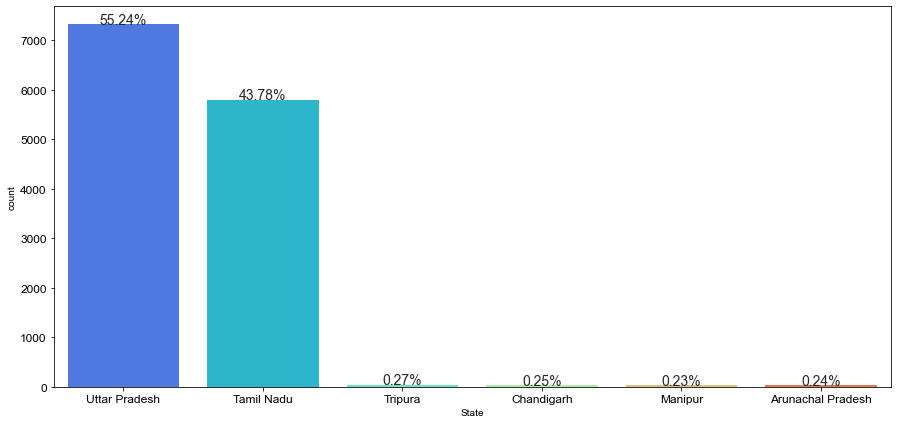

In [ ]:
fig = plt.figure(figsize = (15,7))
s = sns.countplot(x = 'State',data = data, palette='rainbow')
sns.set(style = "whitegrid")
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2,
            height + 10,
            '{:1.2f}%'.format(height/len(data)*100),
            ha="center", fontsize=14) 

__Observation__

- __Uttar Pradesh & Tamil Nadu__ has most of the customers.
- __Uttar Pradesh has the highest customers (55.24%).__

### Analysis based on Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).

__Let's first visualize what are the top 15 brands using a waffle chart__ 

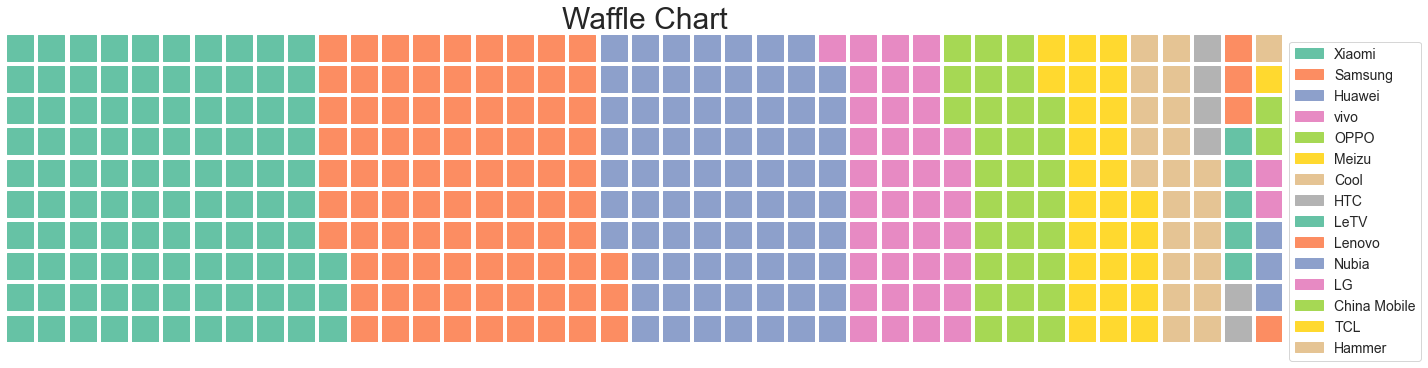

In [ ]:
values = {k:v for k,v in zip(data["Mobile_Brand"].value_counts()[:15].index, data["Mobile_Brand"].value_counts().values)}

# plot the data using pywaffle
plt.figure(
    FigureClass = Waffle,
    rows = 10,
    columns = 41,
    values = values,
    legend = {'loc': 'upper left', 'bbox_to_anchor': (1, 1), "fontsize": "14"},
    figsize = (20, 7))

plt.title("Waffle Chart", fontsize = 30);

__Let's find the top 10 brands as well as the top 10 models with highest customers__

Text(0, 0.5, 'Count')

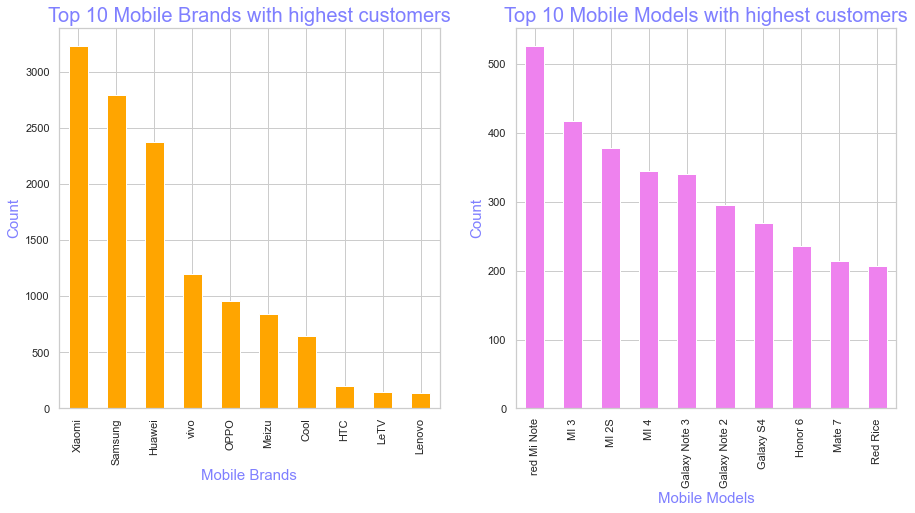

In [ ]:
f, ax = plt.subplots(1,2, figsize = (15,7))
data.groupby("Mobile_Brand")["Customer_Count"].count().sort_values(ascending = False)[:10].plot(kind = "bar", color = "orange", ax= ax[0], colormap = "Dark2")                                                                           
data.groupby("Mobile_Model")["Customer_Count"].count().sort_values(ascending = False)[:10].plot(kind = "bar",  color = "violet", ax= ax[1], colormap = "Dark2")
                                                                         

ax[0].set_title('Top 10 Mobile Brands with highest customers', size=20, alpha=0.5, color='blue')
ax[0].set_xlabel('Mobile Brands', size=15, alpha=0.5, color='blue')
ax[0].set_ylabel('Count', size=15, alpha=0.5, color='blue')
          

ax[1].set_title('Top 10 Mobile Models with highest customers', size=20, alpha=0.5, color='blue')
ax[1].set_xlabel('Mobile Models', size=15, alpha=0.5, color='blue')
ax[1].set_ylabel('Count', size=15, alpha=0.5, color='blue')

__Observation__

- Amongst the top 10 mobile brands, __Xiaomi, Samsung & Huawei__ have the most number of customers.
- Amongst the top 10 mobile models, __Redmi Note, MI 3 & MI2S__ have the most number of customers.

### Analysis based on Distribution of Users across Gender.

Text(0.5, 1.0, 'Data distribution across Gender')

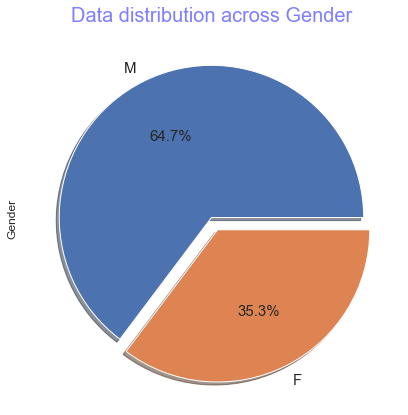

In [ ]:
fig = plt.figure(figsize = (15,7))
ax = data["Gender"].value_counts().plot(kind = "pie", explode = [0, 0.09], autopct = "%3.1f%%", shadow = True, fontsize = 15)
ax.set_title('Data distribution across Gender', size=20, alpha=0.5, color='blue')

__Observation__ 

- Across the states, there are almost double Male users than Female users in the dataset. While there are 64.7% Male users, only 35.3% are Female users.

### Analysis based on Distribution of Users across Age Segments.

__Let's first understand what are the median ages among the different states__

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

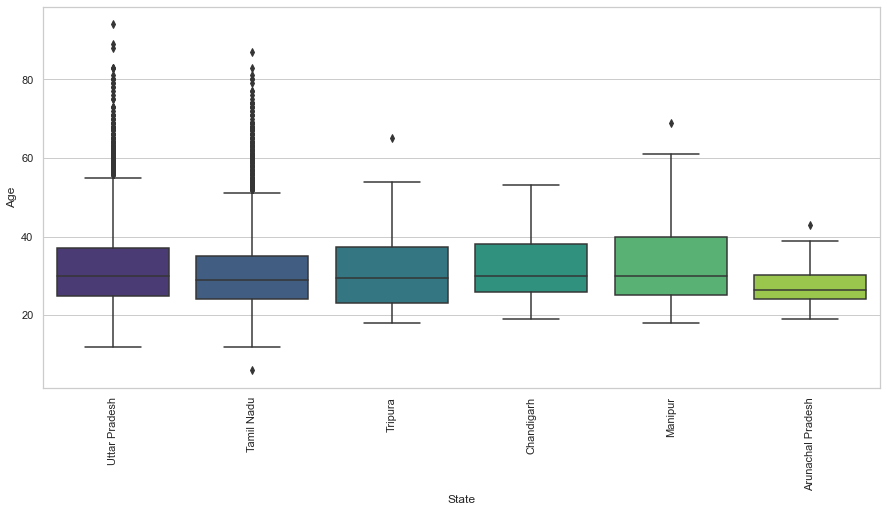

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=data, x='State', y='Age', palette='viridis', width=0.8)
plt.xticks(rotation=90)

__Observation__
- 50% of the users across the states are between 25-40.
- Uttar Pradesh and Tamil Nadu have few users above 60 and below 18.
- Arunachal Pradesh users are mostly between 20-40.

__Let's use Age_group column and check the distribution__

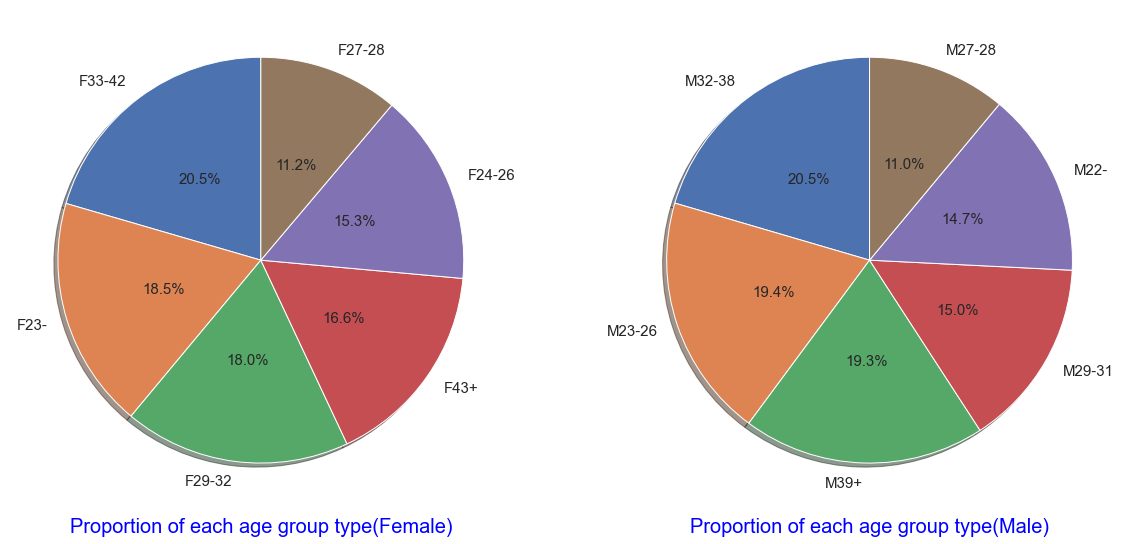

In [ ]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
figure = plt.figure(figsize=[20, 20])
plt.subplot(1, 2, 1)

genF = data[data.Gender=='F']
genF['Age_group'].value_counts().plot(kind='pie',  autopct='%1.1f%%', 
                                       startangle=90, shadow=True,  pctdistance=0.5,textprops={'fontsize': 15})
plt.xlabel('Proportion of each age group type(Female)',  size = 20, color='blue')
plt.ylabel('')


plt.subplot(1, 2, 2)
genM = data[data.Gender=='M']
genM['Age_group'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                       startangle=90, shadow=True, pctdistance=0.5,textprops={'fontsize': 15})
plt.xlabel('Proportion of each age group type(Male)',size = 20, color='blue')
plt.ylabel('')
plt.show()

__Observation__

- In terms of distribution of data, most of the groups are similar to each other, so to understand this better, we will try to  regroup them and then do the analysis.

In [ ]:
#Creating a function for regrouping
def NewGroup(age, gender):
    ageGroup = {'20-': [0,20], '21-30':[21,30], '31-40':[31,40], '40-60':[40,60],'60+':[60,100]}
    for group in ageGroup:
        if(age>= ageGroup[group][0] and age <= ageGroup[group][1]):
            return ('F' if gender == 'F' else 'M') + group

In [ ]:
data['New_Group'] = data.apply(lambda x: NewGroup(x.Age,x.Gender), axis =1)
data['New_Group'].value_counts()

M21-30    4192
M31-40    2400
F21-30    2307
M40-60    1242
F31-40    1159
F40-60     799
M20-       629
F20-       288
F60+       122
M60+       118
Name: New_Group, dtype: int64

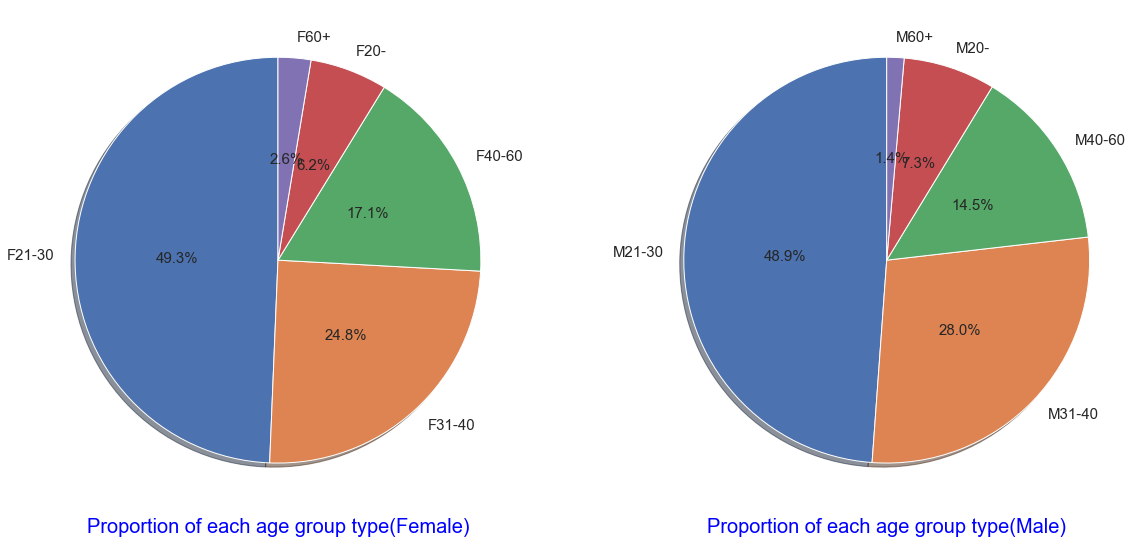

In [ ]:
colors_list = ['red', 'green', 'lightcoral', 'blue', 'lightgreen']
figure = plt.figure(figsize=[20, 20])
plt.subplot(1, 2, 1)

genF = data[data.Gender=='F']
genF['New_Group'].value_counts().plot(kind='pie',  autopct='%1.1f%%', 
                                       startangle=90, shadow=True,  pctdistance=0.5,textprops={'fontsize': 15})
plt.xlabel('Proportion of each age group type(Female)',  size = 20, color = "blue")
plt.ylabel('')


plt.subplot(1, 2, 2)
genM = data[data.Gender=='M']
genM['New_Group'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                       startangle=90, shadow=True, pctdistance=0.5,textprops={'fontsize': 15})
plt.xlabel('Proportion of each age group type(Male)',size = 20, color = "blue")
plt.ylabel('')
plt.show()

__Observation__ 

- It is very evident that almost 50% of the users, both in Male and Female category are between the age group 21-30.
- Next biggest category is between 31-40 contributing to almost 1/4th of the telecom customers.
- Above 40 and under 20 constitute the remaining customers. 
- The telecom company can focus on age groups, 31-40 and 40-60 to expand their business.

__Let's create a new column for Age Category and do analysis between Age:6 to 95 by splitting them into four categories__

In [ ]:
#Let's create a new column AgeCategory
bins = [0, 18, 30, 50, 95]
labels = ["Adolescence", "Young Adult", "Middle-aged Adult", "Old-aged Adult"]
data["Age_Category"] = pd.cut(data.Age, bins = bins, labels = labels)

| Age           | Age Category                                              |
| ------------- |:-------------                                            :| 
| 6 - 18       | Adolescence                                                     |  
| 18 - 30       | Yound Adult                                               | 
| 30 - 50       | Middle-aged Adult                                         |   
| 50 - 95       | Old-aged Adult       

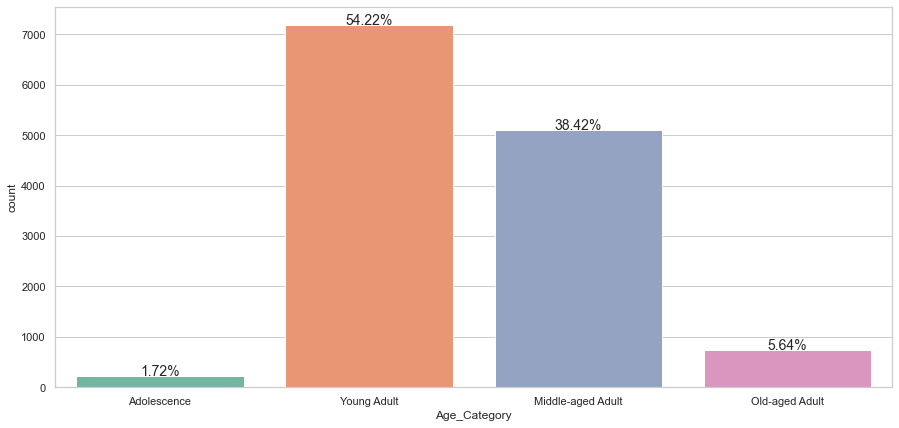

In [ ]:
fig = plt.figure(figsize = (15,7))
s = sns.countplot(x = 'Age_Category',data = data, palette='Set2')
sns.set(style = "whitegrid")
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2,
            height + 10,
            '{:1.2f}%'.format(height/len(data)*100),
            ha="center", fontsize=14) 

__Observation__

- Yound Adult & Middle-ages Adult categories constitute most of the customers.

__Understanding the distribution of Age data__

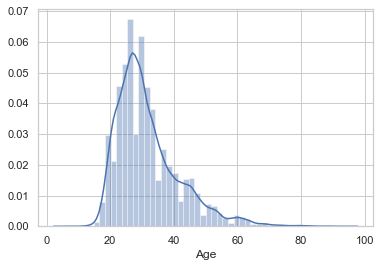

In [ ]:
sns.distplot(data.Age)

__Since most of the customer ages are between 20 to 40, we will take only those and do an in-depth analysis.__

In [ ]:
#Creating a new column that has only Age 20 to 40
bins = [20, 25, 30, 35, 40]
labels = ["20-25", "25-30", "30-35", "35-40"]
data["Age_20to40"] = pd.cut(data.Age, bins = bins, labels = labels)

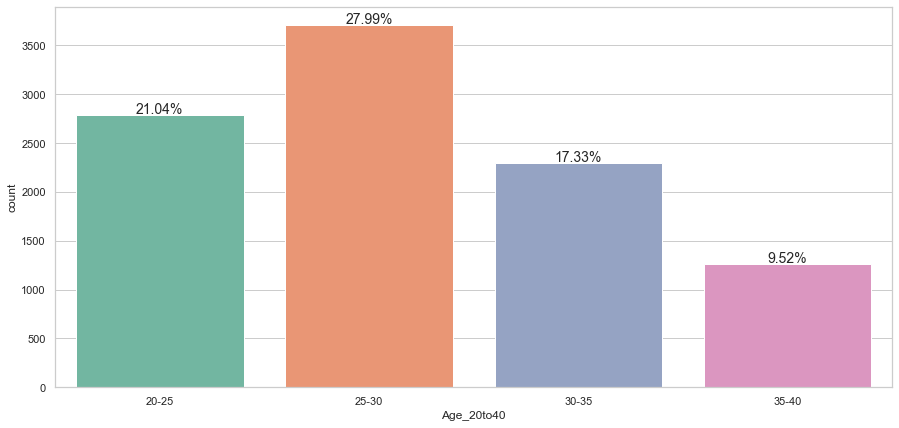

In [ ]:
fig = plt.figure(figsize = (15,7))
s = sns.countplot(x = 'Age_20to40',data = data, palette='Set2')
sns.set(style = "whitegrid")
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2,
            height + 10,
            '{:1.2f}%'.format(height/len(data)*100),
            ha="center", fontsize=14)

__Observation__

- Customers aged between 25 to 30 are the highest with around 28%.

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text major ticklabel objects>)

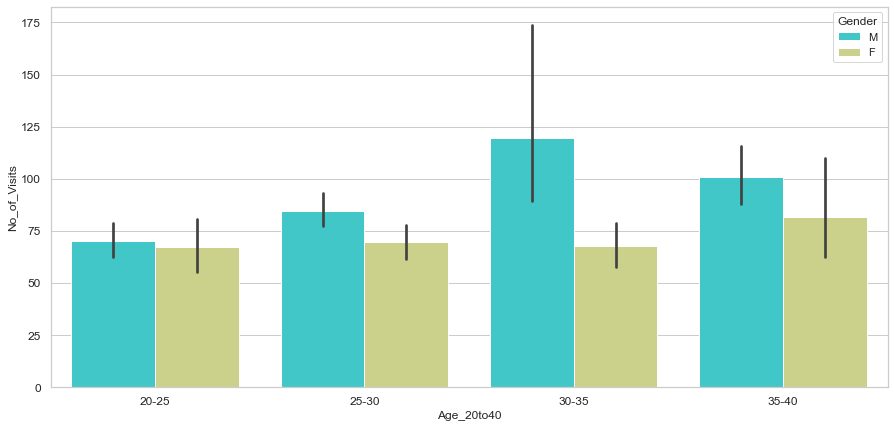

In [ ]:
plt.figure(figsize = (15,7))
sns.barplot(data = data, x = "Age_20to40", y = "No_of_Visits", hue = "Gender", palette = "rainbow")
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)

__Observation__

- There are more male customers in the age group 30 to 35, also the variation of the data is more spread.
- There are more female customers in the age group 35 to 40 compared to other groups.
- Age group 20 to 25, 25 to 30 have less variation in the data.

### Analysis based on Distribution of Phone Brands(Considered only 10 Most used Phone Brands) for each Age Segment, State, Gender.

__Phone Brand vs Age Segment__

In [ ]:
#Selecting the top 10 mobile brands
data["Mobile_Brand"].value_counts()[:10]
#Creating a list and putting all the top 10 brand names into it
brand_list = ['Xiaomi','Samsung', 'Huawei','vivo','OPPO','Meizu','Cool','HTC','LeTV','Lenovo']
#Creating a dataframe that has only the top 10 brands
top10_brand = data[data['Mobile_Brand'].isin(brand_list)]

In [ ]:
fig = px.treemap(top10_brand, path=['Mobile_Brand','Age_group'], values='Customer_Count', color='Mobile_Brand')
fig.update_layout(title_text="TreeMap showing the top 10 brands and the different age groups using those brands")
fig.show()

__Observation__

- Xiaomi has more cusotmers with the age group of M32-38.
- Samsung & Huawei have more cusotmers with the age group of M39+.

__Phone Brand vs State__

Text(0.5, 1.0, 'Top 10 Brands used in each State')

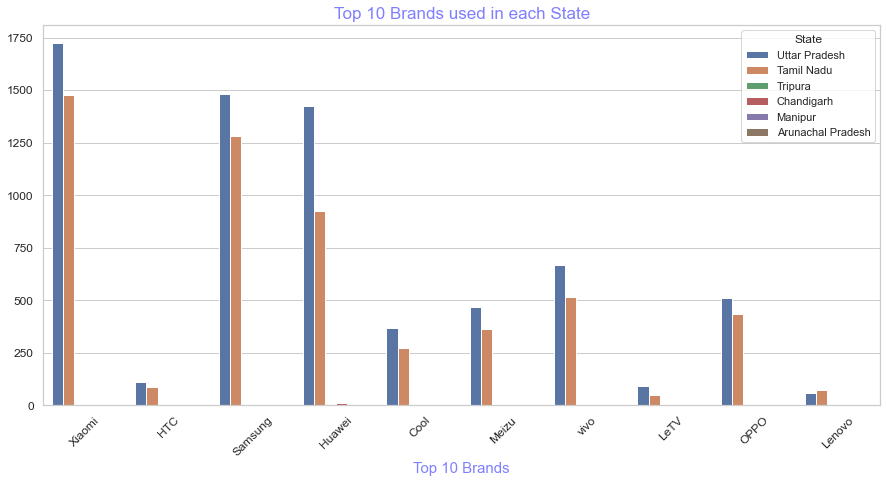

In [ ]:
fig = plt.figure(figsize = (15,7))
sns.countplot(data = top10_brand, x = "Mobile_Brand", hue = "State")
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.ylabel("")
plt.xlabel('Top 10 Brands', size=15, alpha=0.5, color='blue')
plt.title('Top 10 Brands used in each State', size=17, alpha=0.5, color='blue')

__Observation__

- For all the top 10 brands except Lenovo, UP leads.

__Phone Brand vs Gender__

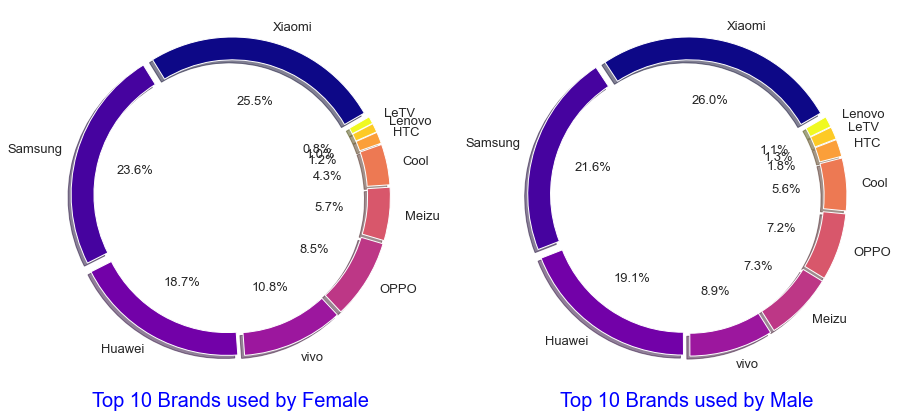

In [ ]:
figure = plt.figure(figsize=[20, 20])
plt.subplot(1, 2, 1)

genF = top10_brand[top10_brand.Gender=='F']
genF['Mobile_Brand'].value_counts().plot(kind = "pie", explode = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05], shadow = True,
                                                        figsize = (15,7), fontsize = 13, autopct = "%3.1f%%", legend = False,
                                                        cmap = "plasma", startangle = 30,wedgeprops=dict(width=0.15))
plt.xlabel('Top 10 Brands used by Female',  size = 20, color = "blue")
plt.ylabel('')


plt.subplot(1, 2, 2)
genM = top10_brand[top10_brand.Gender=='M']
genM['Mobile_Brand'].value_counts().plot(kind = "pie", explode = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05], shadow = True,
                                                        figsize = (15,7), fontsize = 13, autopct = "%3.1f%%", legend = False,
                                                        cmap = "plasma", startangle = 30,wedgeprops=dict(width=0.15))
plt.xlabel('Top 10 Brands used by Male',size = 20, color = "blue")
plt.ylabel('')
plt.show()

__Observation__

- Xiaomi, Samsung & Huawei are the favourite amongst men and women customers.
- Samsung & Vivo brand are more preferred by female customers. 

### Analysis based on Distribution of Gender for each State, Age Segment and Phone Brand(Considered only 10 Most used Phone Brands)

#### Gender vs State

In [ ]:
table = pd.pivot_table(data, values='Customer_Count', index=['State'],columns=['Gender'], aggfunc=np.sum)
labels = table.index
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=table.M, name="Male"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=table.F, name="Female"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="State-wise Customers based on Gender",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Male', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Female', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

__Observation__

- There are more male customers in Uttar Pradesh, Arunachal Pradesh and Manipur.
- There are more female customers in Tamil Nadu, Chandigarh and Tripura.

__Let's find out the customers by city/municipality__

In [ ]:
#Creating a Treemap for each city based on gender
fig = px.treemap(data, path=['Gender', 'City_or_Municipality'], values='Customer_Count', color='Gender')
fig.update_layout(title_text="TreeMap showing customer count in each city based on gender")
fig.show()

#### Gender vs Age Segment

| Age           | Age Category                                              |
| ------------- |:-------------                                            :| 
| 6 - 18       | Adolescence                                                     |  
| 18 - 30       | Yound Adult                                               | 
| 30 - 50       | Middle-aged Adult                                         |   
| 50 - 95       | Old-aged Adult       

In [ ]:
table1 = pd.pivot_table(data, values='Customer_Count', index=['Age_Category'],columns=['Gender'], aggfunc=np.sum)
labels = table1.index
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=table1.M, name="Male"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=table1.F, name="Female"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Age Category-wise Customers based on Gender",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Male', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Female', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

__Observation__

- Young adult category constitutes almost same percent in both men and women.
- Middle aged adult are found more in male group.
- Old aged adult are found more in female group.

#### Gender vs Top 10 Brands

__What are the top 10 brands and models based on gender usage?__

Text(0.5, 0, 'Mobile Models')

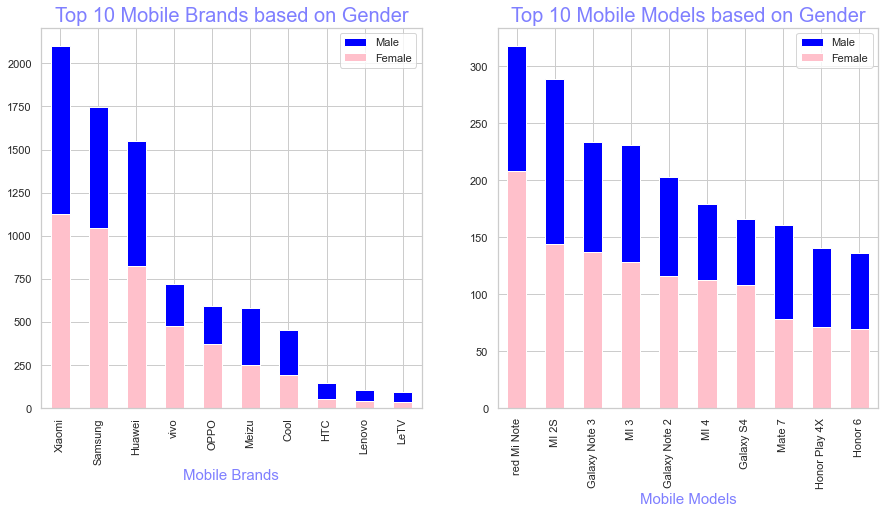

In [ ]:
f, ax = plt.subplots(1,2, figsize = (15,7))

data[data["Gender"] == "M"]["Mobile_Brand"].value_counts()[:10].plot(kind = "bar", color = "blue", ax = ax[0])
data[data["Gender"] == "F"]["Mobile_Brand"].value_counts()[:10].plot(kind = "bar", color = "pink", ax = ax[0])
ax[0].legend(['Male', 'Female'])

data[data["Gender"] == "M"]["Mobile_Model"].value_counts()[:10].plot(kind = "bar", color = "blue", ax = ax[1])
data[data["Gender"] == "F"]["Mobile_Model"].value_counts()[:10].plot(kind = "bar", color = "pink", ax = ax[1])
ax[1].legend(['Male', 'Female'])

ax[0].set_title('Top 10 Mobile Brands based on Gender', size=20, alpha=0.5, color='blue')
ax[0].set_xlabel('Mobile Brands', size=15, alpha=0.5, color='blue')

ax[1].set_title('Top 10 Mobile Models based on Gender', size=20, alpha=0.5, color='blue')
ax[1].set_xlabel('Mobile Models', size=15, alpha=0.5, color='blue')


__Observation__

- From the stacked bar chart, we can clearly infer that Xiaomi, Samsung & Huawei brands are the most preferred by both men and women.
- However, male customers are the highest in all top 10 brands as well as models.

### Analysis based on Distribution of Age Segments for each State, Gender and Phone Brand(Considered only 10 Most used Phone Brands)

#### Analysis based on Age Categories (Age:6 to 95)

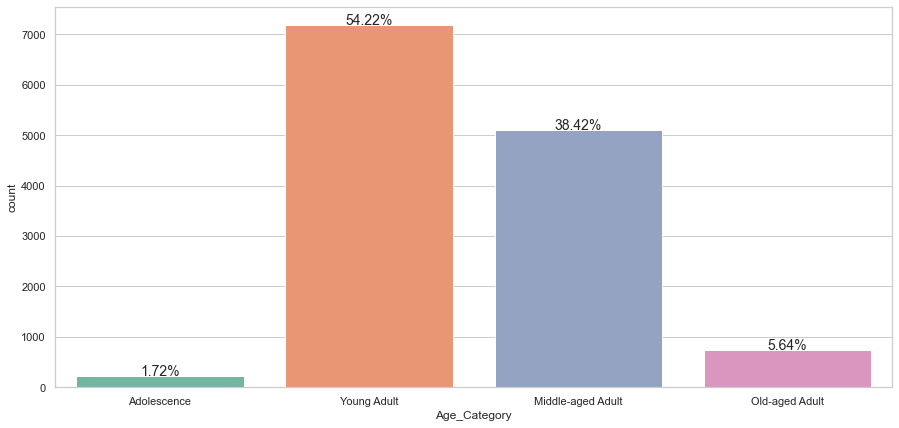

In [ ]:
fig = plt.figure(figsize = (15,7))
s = sns.countplot(x = 'Age_Category',data = data, palette='Set2')
sns.set(style = "whitegrid")
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2,
            height + 10,
            '{:1.2f}%'.format(height/len(data)*100),
            ha="center", fontsize=14) 

#### Age Segment vs State

In [ ]:
table2 = pd.pivot_table(data, values='Customer_Count', index=['State'],columns=['Age_Category'], aggfunc=np.sum)
labels = table2.index

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=table2["Adolescence"], name="Adolescence"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=table2["Young Adult"], name="Young Adult"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=table2["Middle-aged Adult"], name="Middle-aged Adult"),
              2, 1)
fig.add_trace(go.Pie(labels=labels, values=table2["Old-aged Adult"], name="Old-aged Adult"),
              2, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="State-wise Customers based on Age Categories",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='6 to 18', x=0.19, y=0.8, font_size=12, showarrow=False),
                 dict(text='18 to 30', x=0.815, y=0.8, font_size=12, showarrow=False),
                dict(text='30 to 50', x=0.185, y=0.18, font_size=12, showarrow=False),
                dict(text='50+', x=0.80, y=0.18, font_size=12, showarrow=False)])
fig.show()

__Observation__

- Uttar Pradesh has more customers in age categories : 18 to 30, 30 to 50 & 50+
- Tamil Nadu has more customers in age category : 6 to 18.


#### Age Segment vs Gender

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

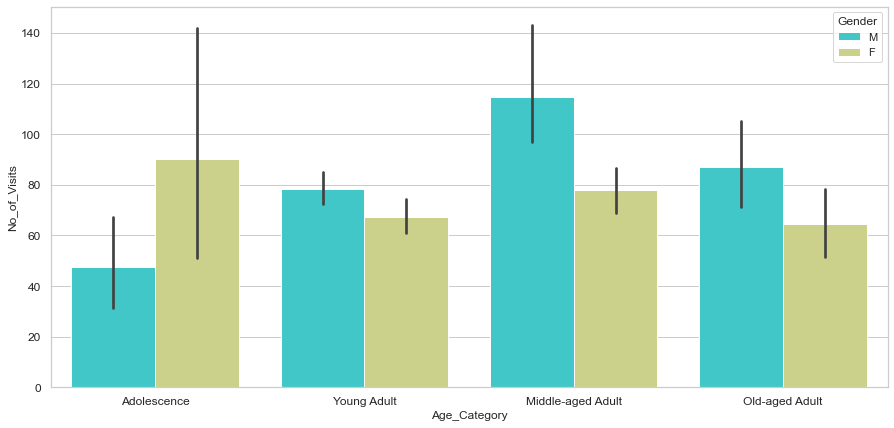

In [ ]:
plt.figure(figsize = (15,7))
sns.barplot(data = data, x = "Age_Category", y = "No_of_Visits", hue = "Gender", palette = "rainbow")
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)

__Observation__

- Adolescence is the only category that has more female customers.
- Male customers lead female customers in other three categories : young adult, middle agd adult & old aged adult.

#### Age Segment vs Phone Brands

In [ ]:
fig = px.treemap(top10_brand, path=['Age_Category', 'Mobile_Brand'], values='Customer_Count', color='Age_Category')
fig.update_layout(title_text="Age Segment Vs Phone Brand")
fig.show()

#### Analysis based on Age Group

In [ ]:
brands = data.groupby("Age_group")["Mobile_Model"].count().sort_values(ascending = False)
brands_dict = brands.to_dict()
brands_dict

{'M32-38': 1756,
 'M23-26': 1664,
 'M39+': 1657,
 'M29-31': 1291,
 'M22-': 1265,
 'F33-42': 958,
 'M27-28': 948,
 'F23-': 863,
 'F29-32': 843,
 'F43+': 775,
 'F24-26': 714,
 'F27-28': 522}

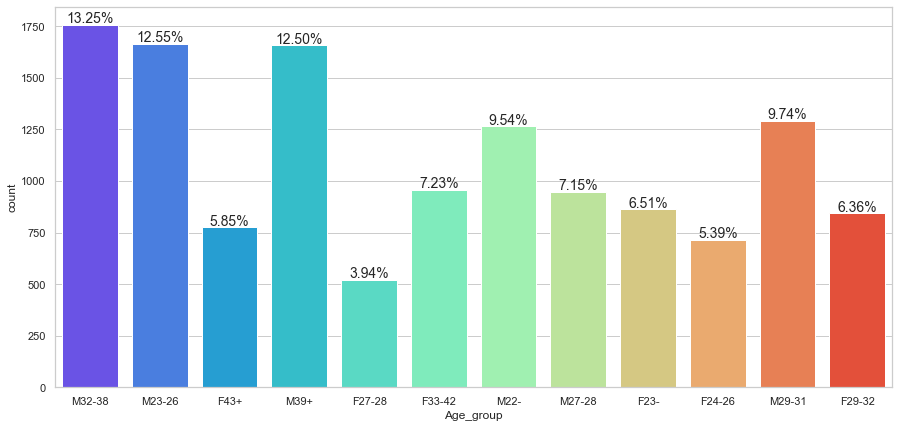

In [ ]:
fig = plt.figure(figsize = (15,7))
s = sns.countplot(x = 'Age_group',data = data, palette='rainbow')
sns.set(style = "whitegrid")
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2,
            height + 10,
            '{:1.2f}%'.format(height/len(data)*100),
            ha="center", fontsize=14) 

Text(0.5, 1.0, 'Treemap showing Age groups and the different models they use')

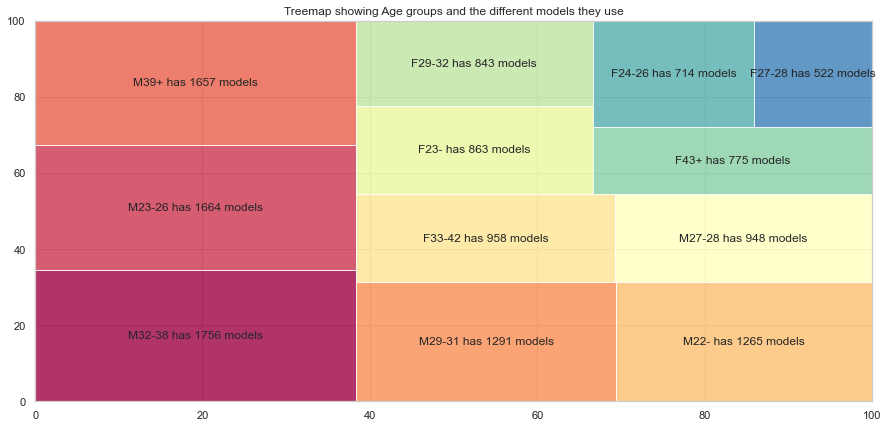

In [ ]:
# create the labels using a list comprehesion
labels = ["{} has {} models".format(class_, obs) for class_, obs in brands_dict.items()]

# create n colors based on the number of labels we have
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# instanciate the figure
plt.figure(figsize = (15, 7))

# plot the data using squarify
squarify.plot(sizes = brands_dict.values(), label = labels,  color = colors, alpha = 0.8)

plt.title("Treemap showing Age groups and the different models they use")

#### In-Depth Analysis of Age Segment

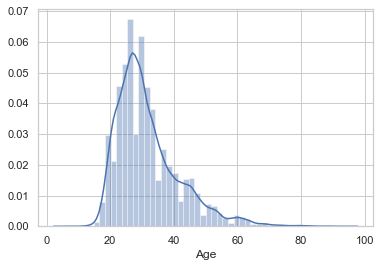

In [ ]:
sns.distplot(data.Age)

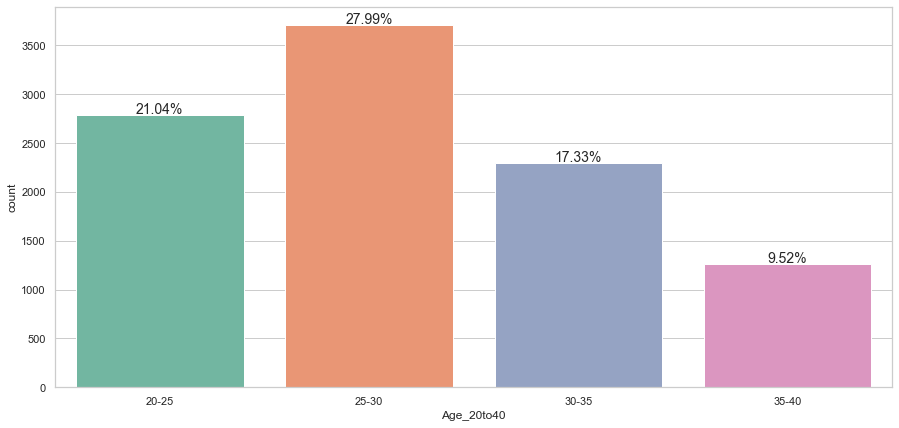

In [ ]:
fig = plt.figure(figsize = (15,7))
s = sns.countplot(x = 'Age_20to40',data = data, palette='Set2')
sns.set(style = "whitegrid")
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2,
            height + 10,
            '{:1.2f}%'.format(height/len(data)*100),
            ha="center", fontsize=14)

__Observation__

- There are more customers in the age between 25 to 30.

In [ ]:
table3 = pd.pivot_table(data, values='Customer_Count', index=['Age_20to40'],columns=['State'], aggfunc=np.sum)
labels = table3.index

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=table3["Arunachal Pradesh"], name="Arunachal Pradesh"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=table3["Chandigarh"], name="Chandigarh"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=table3["Manipur"], name="Manipur"),
              1, 3)
fig.add_trace(go.Pie(labels=labels, values=table3["Tamil Nadu"], name="Tamil Nadu"),
              2, 1)
fig.add_trace(go.Pie(labels=labels, values=table3["Tripura"], name="Tripura"),
              2, 2)
fig.add_trace(go.Pie(labels=labels, values=table3["Uttar Pradesh"], name="Uttar Pradesh"),
              2, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="State-wise Customers based on Age between 20 to 40",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='AP', x=0.13, y=0.8, font_size=12, showarrow=False),
                 dict(text='CH', x=0.50, y=0.8, font_size=12, showarrow=False),
                dict(text='MN', x=0.87, y=0.8, font_size=12, showarrow=False),
                dict(text='TN', x=0.13, y=0.18, font_size=12, showarrow=False),
                dict(text='TR', x=0.50, y=0.18, font_size=12, showarrow=False),
                dict(text='UP', x=0.87, y=0.18, font_size=12, showarrow=False)])
fig.show()

__Observation__

- Arunachal Pradesh has more customers with age between 20-25 & 25-30, both are almost same in the percentage.
- Customers with age between 25-30 is found to be the highest in other states.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text major ticklabel objects>)

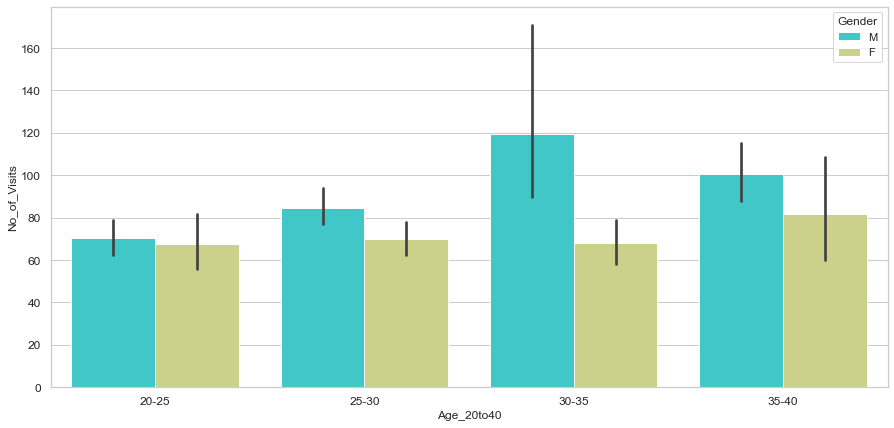

In [ ]:
plt.figure(figsize = (15,7))
sns.barplot(data = data, x = "Age_20to40", y = "No_of_Visits", hue = "Gender", palette = "rainbow")
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)

__Observation__

- There is less variance in the data amongst the age between 20-25 & 25-30 for both male & female.

In [ ]:
data1 = data.copy()
data1.dropna(axis = 0, inplace = True)
fig = px.treemap(data1, path=['Age_20to40', 'Mobile_Brand'], values='Customer_Count', color='Age_20to40')
fig.update_layout(title_text="Age Segment Vs Phone Brand")
fig.show()

### Analysis based on Hourly distribution of Phone Calls.

In [ ]:
# Converting the timestamp column in datetime64
data['Timestamp'] = data['Timestamp'].astype('datetime64[ns]')
#Let's separate date and time into new columns
data['date'] = pd.to_datetime(data['Timestamp']).dt.date
data['time'] = pd.to_datetime(data['Timestamp']).dt.time
# Creating new column for hours
data['hour'] = pd.to_datetime(data['Timestamp']).dt.hour
# Creating new column day_of_week
data['day_of_week'] = data['Timestamp'].dt.day_name()

Text(0.5, 1.0, 'Hourly distribution of Phone Calls')

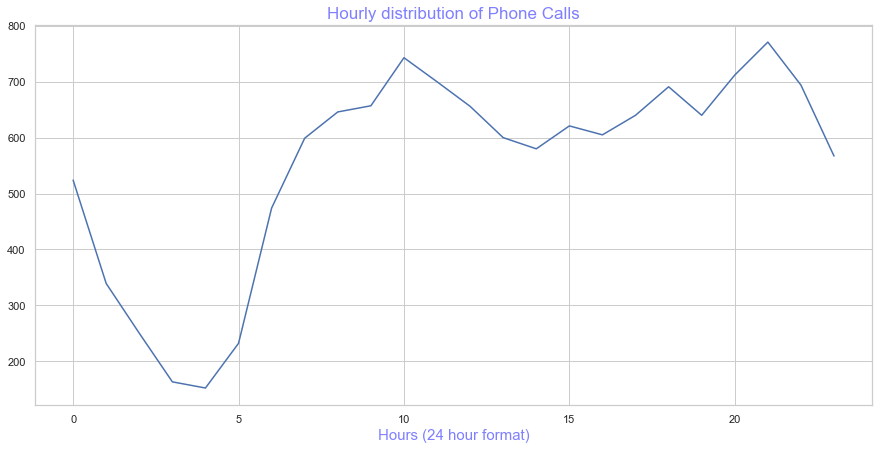

In [ ]:
fig = plt.figure(figsize= (15, 7))
data.hour.value_counts().sort_index().plot(kind = "line")
plt.xlabel('Hours (24 hour format)', size=15, alpha=0.5, color='blue')
plt.title('Hourly distribution of Phone Calls', size=17, alpha=0.5, color='blue')

__Hourly distribution based on gender__

Text(0.5, 1.0, 'Customers (M/F) accessing Network at different hours in a day')

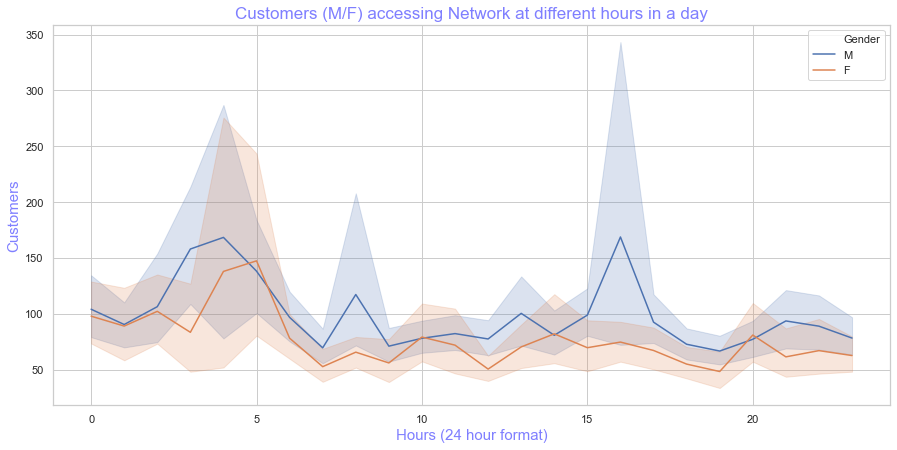

In [ ]:
fig = plt.figure(figsize = (15,7))
sns.lineplot(data = data, x = "hour", y = "No_of_Visits", hue = "Gender")
plt.ylabel("Customers", size=15, alpha=0.5, color='blue')
plt.xlabel('Hours (24 hour format)', size=15, alpha=0.5, color='blue')
plt.title('Customers (M/F) accessing Network at different hours in a day', size=17, alpha=0.5, color='blue')

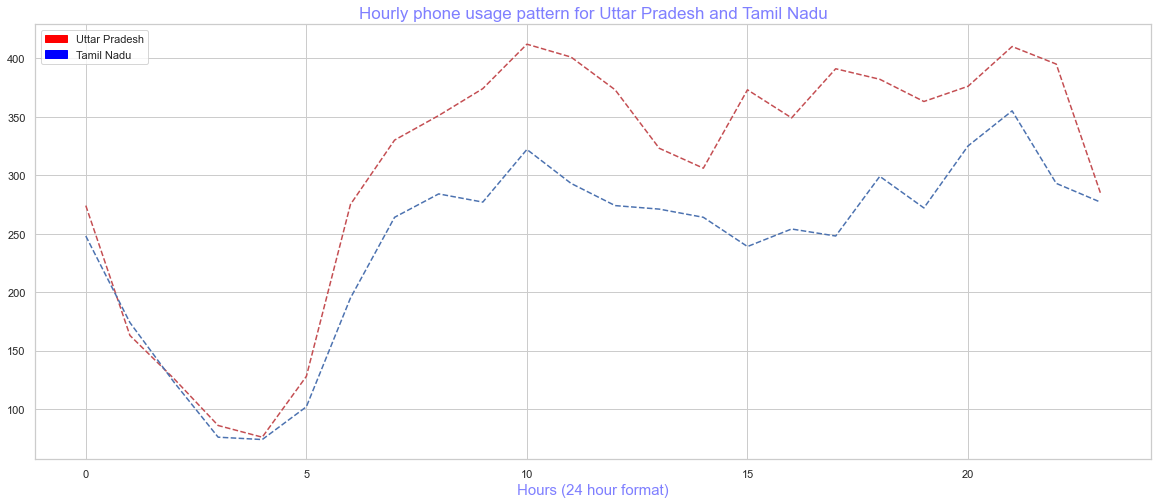

In [ ]:
hourly_usage_array = []
states = data.State.unique()
for state in data.State.unique():
    hourly_usage = data[data.State == state].hour.value_counts().sort_index()
    hourly_usage_array.append(hourly_usage)
    
fig = plt.figure(figsize=[20, 8])
i=0
line_cols= ['r--','b--','g--','y--','c--','k--']
red_patch = mpatches.Patch(color='red', label=states[0])
blue_patch = mpatches.Patch(color='blue', label= states[1])
plt.legend(handles=[red_patch,blue_patch])
plt.plot(hourly_usage_array[0], line_cols[0], hourly_usage_array[1], line_cols[1])
plt.ylabel("")
plt.xlabel('Hours (24 hour format)', size=15, alpha=0.5, color='blue')
plt.title('Hourly phone usage pattern for Uttar Pradesh and Tamil Nadu', size=17, alpha=0.5, color='blue')
plt.show()

__Observation__

- Phone usage in UP & TN are almost same till 5 AM in the morning, after that they pick up.
- UP has more customer visits compared to TN. 

In [ ]:
fig = plt.figure(figsize = (15,7))
data.groupby("day_of_week")["No_of_Visits"].mean().plot(kind = "barh")
plt.ylabel("")
plt.xlabel('Hours (24 hour format)', size=15, alpha=0.5, color='blue')
plt.title('Average customers visits', size=17, alpha=0.5, color='blue')

__Observation__

- There are more customers accessing the network on Tuesday & Friday.

### Plotting the Users on the India Map

__Find the customer data at exact location level__

In [ ]:
#Counting the number of customer in each location and putting them into a new column
data["No_of_Customers"] = data["Place"].map(data.groupby("Place")["Customer_Count"].sum().sort_values(ascending = False))
#Counting the number of customer visits per location and putting them into a new column
data["No_of_Customer_visits"] = data["Place"].map(data.groupby("Place")["No_of_Visits"].sum().sort_values(ascending = False))

#Creating a duplicate copy of the dataframe for place
place = data.copy()
place.drop_duplicates(["Place"], inplace = True)
place = place.reset_index(drop = True)
place.shape

__Find the customer data at city level__

In [ ]:
#Counting the number of customer in each city and putting them into a new column
data["No_of_Customers_per_City"] = data["City_or_Municipality"].map(data.groupby("City_or_Municipality")["Customer_Count"].sum().sort_values(ascending = False))
#Counting the number of customer visits per city and putting them into a new column
data["No_of_Customer_visits_per_City"] = data["City_or_Municipality"].map(data.groupby("City_or_Municipality")["No_of_Visits"].sum().sort_values(ascending = False))

#Creating a duplicate copy of the dataframe for cities
cities = data.copy()
cities.drop_duplicates(["City_or_Municipality"], inplace = True)
cities = cities.reset_index(drop = True)
cities.shape

In [ ]:
data.head(5)

__Doing slight corrections for the coordinates__

In [ ]:
#data[data["No_of_Customer_visits"] == 273844]
#data[data["No_of_Customer_visits"] == 29225]

data.Latitude[data.Place == "Kattivakkam"] = 13.2161
data.Longitude[data.Place == "Kattivakkam"] = 80.3182
data.Latitude[data.Place == "Tiruvottiyur"] = 13.1643
data.Longitude[data.Place == "Tiruvottiyur"] = 80.3001

#### Pin-pointing the cities where customers are located

In [ ]:
#Plotting Map
map_1 = folium.Map(location=[20.5936832,78.962883], tiles='cartodbpositron', zoom_start=5)
# Add points to the map
for idx, row in cities.iterrows():
    Marker([row['Latitude'], row['Longitude']], popup = row["Place"], tooltip = row["City_or_Municipality"]).add_to(map_1)
# Display the map
map_1

#### Highlighting the number of customers according to their city as well as the number of times they accessed INSAID Network

In [ ]:
center_lat = cities.mean().Latitude
center_long = cities.mean().Longitude

m = folium.Map(location=[center_lat, center_long], zoom_start=4.5)

for city in cities["City_or_Municipality"].unique():
    city_data = cities[cities["City_or_Municipality"]== city]
    folium.CircleMarker(
        location=[city_data.Latitude.values[0], city_data.Longitude.values[0]],
        radius = float(city_data["No_of_Customers_per_City"].values[0]/100),
        popup="Customer Visits : %s"%city_data["No_of_Customer_visits_per_City"].values[0],
        tooltip = city_data.No_of_Customers_per_City.values[0],
        color="blue",
        fill_color="blue"
    ).add_to(m)

m

#### Focusing on Tamil Nadu - Exact Place

In [ ]:
tn_districts = place[place["State"]=="Tamil Nadu"]

center_lat = tn_districts.mean().Latitude
center_long = tn_districts.mean().Longitude

m = folium.Map(location=[center_lat, center_long], zoom_start=6.5, tiles="CartoDB dark_matter")

for district in tn_districts["Place"].unique():
    district_census = tn_districts[tn_districts["Place"]==district]
    folium.Circle(
        location=[district_census.Latitude.values[0], district_census.Longitude.values[0]],
        radius = float(district_census["No_of_Customers"].values[0]*10),
        color="orange",
        fill_color="orange",
        popup="Total Customers  : %s"%district_census["No_of_Customers"].values[0],
        tooltip = district_census.Place.values[0],
    ).add_to(m)

m

#### Focusing on Uttar Pradesh - Exact Place

In [ ]:
up_districts = place[place["State"]=="Uttar Pradesh"]


center_lat = up_districts.mean().Latitude
center_long = up_districts.mean().Longitude

m = folium.Map(location=[center_lat, center_long], zoom_start=6.5, tiles="CartoDB dark_matter")

for district in up_districts["Place"].unique():
    district_census = up_districts[up_districts["Place"]==district]
    folium.RegularPolygonMarker(
        location=[district_census.Latitude.values[0], district_census.Longitude.values[0]],
        radius = float(district_census["No_of_Customers"].values[0]/50),
        rotation=0,
        color="beige",
        popup="Total Customers : %s"%district_census["No_of_Customers"].values[0],
        tooltip = district_census.Place.values[0],
        fill_color="white"
    ).add_to(m)

m

#### Using Shape File

#### Plotting the data district wise for Uttar Pradesh 

In [ ]:
up = r"G:\Capstone Project Data Analysis\shp\UttarPradesh\d65ad6db-70b8-43fd-9a73-674deae6106e202043-1-1fdrpn4.yjwq.shp"
up_df = gpd.read_file(up)
up_df.rename(columns={'NAME_2': 'City_or_Municipality'},inplace=True)
up_df.shape

In [ ]:
fig, ax = plt.subplots(1, figsize = (20,7))
ax.axis("off")
ax.set_title("Uttar Pradesh", fontdict = {"fontsize": "20","fontweight": "7"})
up_df.plot(ax = ax)

In [ ]:
merged_1= up_df.merge(data, on = "City_or_Municipality", how = "inner")
cols = ['FID', 'ID_0', 'ISO', 'NAME_0', 'ID_1', 'ID_2',
        'NL_NAME_2', 'VARNAME_2', 'TYPE_2', 'ENGTYPE_2',
        'DeviceID', 'Longitude', 'Latitude', 'Place', 'State',
        'Age_group', 'Mobile_Brand', 'Mobile_Model',
        'Customer_Count', 'Age_Category']
merged_1.drop(cols, axis = 1, inplace = True)
merged_1.drop_duplicates(["City_or_Municipality"], inplace = True)
merged_1 = merged_1.reset_index(drop = True)

In [ ]:
fig, ax = plt.subplots(1, figsize = (20,7))
ax.axis("off")
ax.set_title("Uttar Pradesh Data", fontdict = {"fontsize": "25","fontweight": "10"})
merged_1.plot(column = "No_of_Customers_per_City", cmap = "rainbow", linewidth = 0.8, ax = ax, legend = True)

#### Tamil Nadu Data

In [ ]:
tn = r"G:\Capstone Project Data Analysis\shp\TamilNadu\India_Districts_ADM2_GADM.shp"
tn_df = gpd.read_file(tn)
tn_df.rename(columns={'NAME_2': 'City_or_Municipality'},inplace=True)
tn_df.shape

In [ ]:
fig, ax = plt.subplots(1, figsize = (20,7))
ax.axis("off")
ax.set_title("Tamil Nadu", fontdict = {"fontsize": "20","fontweight": "7"})
tn_df.plot(ax = ax)

In [ ]:
merged_2 = tn_df.merge(data, on = "City_or_Municipality", how = "inner")
cols = ['FID', 'ID_0', 'ISO', 'NAME_0', 'ID_1', 'ID_2',
        'NL_NAME_2', 'VARNAME_2', 'TYPE_2', 'ENGTYPE_2',
        'DeviceID', 'Longitude', 'Latitude', 'Place', 'State',
        'Age_group', 'Mobile_Brand', 'Mobile_Model',
        'Customer_Count', 'Age_Category']
merged_2.drop(cols, axis = 1, inplace = True)
merged_2.drop_duplicates(["City_or_Municipality"], inplace = True)
merged_2 = merged_2.reset_index(drop = True)

In [ ]:
fig, ax = plt.subplots(1, figsize = (20,7))
ax.axis("off")
ax.set_title("Tamil Nadu Data", fontdict = {"fontsize": "25","fontweight": "10"})
merged_2.plot(column = "No_of_Customers_per_City", cmap = "rainbow", linewidth = 0.8, ax = ax, legend = True)

#### Plotting in Basemap

In [ ]:
def plot_map(sizes, colorbarValue):

    plt.figure(figsize=(15,9))
    f, ax = plt.subplots(figsize=(15, 9))
    map = Basemap(width=5000000, height=3500000, resolution='l', projection='aea', llcrnrlon=69,llcrnrlat=6, urcrnrlon=99, urcrnrlat=36, lon_0=78, lat_0=20, ax=ax)
    map.drawmapboundary()
    map.drawcountries()
    map.drawcoastlines()
    x, y = map(np.array(data["Longitude"]), np.array(data["Latitude"]))
    cs = map.scatter(x, y, s=sizes, marker="o", c=sizes, cmap=cm.Dark2, alpha=0.5)
    cbar = map.colorbar(cs, location='right',pad="5%")
    cbar.ax.set_yticklabels(colorbarValue)
    plt.show()

In [ ]:
population_sizes = data["No_of_Customers_per_City"].apply(lambda x: int(x / 10))
colorbarValue = np.linspace(data["No_of_Customers_per_City"].min(), data["No_of_Customers_per_City"].max(),num=10)
colorbarValue = colorbarValue.astype(int)
plot_map(population_sizes, colorbarValue)

## Conclusion

EDA is a crucial step to take before diving into machine learning & it is valuable to the data scientist to make certain that the results they produce are valid, correctly interpreted, and applicable to the desired business contexts.

The analysis of the user data helped us reach the following conclusions:

- Amongst the 6 states, Uttar Pradesh & Tamil Nadu holds the highest number of customers.
- Within Uttar Pradesh, Ghaziabad was the top city in terms of highest number of users.
- Within Tamil Nadu, highest number of users came from Thiruvallur. 
- From the given dataset, we found that the highest number of users for Insaid Telecom were Males in the Age group of 20-40 years. 
- Xiaomi, Samsung & Huawei were the top 3 most preferred brands amongst both men and women, across all age –groups. 
- Mobile models used did not change much with Gender or Age.
- Network Usage peaked during mornings (4AM to 8AM) and Evenings (4PM to 8PM) during the time period of this dataset.

## Actionable Insights


- Insaid Telecom needs to make sincere efforts to increase their presence in Chandigarh, Arunachal Pradesh, Tripura and Manipur since these states have only a handful of users for their network. This is a huge opportunity for Insaid Telecom to increase their market share and revenues.
- The network needs to improve usage amongst Female customers, since currently the network has only 33% of Total users who are Female. Hence, Insaid Telecom needs targeted marketing campaigns to reach out to Female customers.
- In terms of the Age Group, Insaid Telecom needs to focus on people older than 50 years, since Insaid Telecom does not have many users in this age group. This is another opportunity for Insaid Telecom, as the adoption of smart phone is now slowly increasing in this age group. 
- Insaid Telecom has a third opportunity to expand its user base in Uttar Pradesh and Tamil Nadu by targeting smaller cities in both these states, where there are few users for their network.
- Insaid Telecom should also consider partnering with Xiaomi, Samsung and/or Huawei (for selected models) to provide value added service to its customers for retention, since these are the top 3 brands that Insaid’s customers are using. 
